# Importing libraries and data. Initial description of data

In [ ]:
!pip install sklearn-genetic
#!pip install eli5
#!pip install shap

In [ ]:
import os
import io
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
#import joblib
from genetic_selection import GeneticSelectionCV
from sklearn import linear_model
from matplotlib import figure

import seaborn as sns
import gc
import sklearn.linear_model as skl_lm
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from pandas.plotting import scatter_matrix
import datetime as dt
import random
import keras
#import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from keras.layers.normalization import 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
import tensorflow
from numpy.random import seed
from IPython.display import display
from wordcloud import WordCloud
import datetime

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import time
import datetime


In [ ]:
#os.chdir('D:\\NCI\\Term3 - Domain Applications of Predictive Analytics\\Project\\Data')

In [ ]:
#upload kaggle API token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"westpole","key":"cfd08cf785b4e30f2628cf79b6b643e7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list kaggle datasets related to 'credit-score-prediction'
!kaggle datasets list -s credit-score-prediction

ref                                                title                                                size  lastUpdated          downloadCount  
-------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
tobycrabtree/nfl-scores-and-betting-data           NFL scores and betting data                         228KB  2020-03-02 01:13:26           6489  
kaggle/college-scorecard                           US Dept of Education: College Scorecard             562MB  2017-11-09 18:03:11          11718  
rikdifos/credit-card-approval-prediction           Credit Card Approval Prediction                       5MB  2020-03-24 10:04:48           3234  
pablote/nba-enhanced-stats                         NBA Enhanced Box Score and Standings (2012 - 2018)   17MB  2018-11-08 04:49:56           8530  
fivethirtyeight/trump-score                        Congress Trump Score                                164KB  2017-06-

In [ ]:
#download the dataset we want
!kaggle datasets download -d prasy46/credit-score-prediction

credit-score-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
raw_file = "credit-score-prediction.zip"
with ZipFile(raw_file, 'r') as zip: 
    zip.printdir()

File Name                                             Modified             Size
CreditScore_test.csv                           2019-09-14 04:32:20     14103110
CreditScore_train.csv                          2019-09-14 04:32:26     56364278


!kaggle competitions download -c ashrae-energy-prediction

In [ ]:
zf = ZipFile(raw_file,'r')

In [ ]:
df_credit_score_train = pd.read_csv(zf.open('CreditScore_train.csv'))
print(df_credit_score_train)
df_credit_score_train.info()
df_credit_score_train.describe(include='all').T

          x001   x002  x003   x004   x005  ...  x301  x302   x303    x304    y
0      1084094  426.0  39.0  128.0  426.0  ...     0   NaN      0     NaN  807
1      1287777  160.0   2.0   64.0  160.0  ...     0   NaN      0     NaN  819
2      1483016  163.0  16.0  104.0  239.0  ...     0   NaN      0     NaN  803
3       959054    NaN   NaN    NaN  102.0  ...     0   NaN      0     NaN  530
4      1342113    3.0   2.0    2.0   62.0  ...     0   NaN      0     NaN  485
...        ...    ...   ...    ...    ...  ...   ...   ...    ...     ...  ...
79995  1482075    2.0   2.0    2.0    2.0  ...     0   NaN      0     NaN  514
79996   994459   75.0  24.0   48.0  269.0  ...     0   NaN      0     NaN  810
79997  1168324  135.0   3.0   50.0  135.0  ...     0   NaN      0     NaN  711
79998  1307105  132.0   1.0   41.0  366.0  ...     0   NaN      0     NaN  684
79999   405160   94.0   3.0   27.0  109.0  ...     0   1.0  44451  1.0286  465

[80000 rows x 305 columns]
<class 'pandas.core.fram

count          mean  ...           75%           max
x001  80000.0  1.218319e+06  ...  1.445546e+06  1.677197e+06
x002  62815.0  1.256073e+02  ...  1.800000e+02  7.180000e+02
x003  62815.0  2.558252e+01  ...  2.400000e+01  7.040000e+02
x004  62819.0  6.537965e+01  ...  9.200000e+01  7.040000e+02
x005  75133.0  1.780436e+02  ...  2.460000e+02  7.900000e+02
...       ...           ...  ...           ...           ...
x301  80000.0  1.057625e-01  ...  0.000000e+00  1.000000e+00
x302  21529.0  2.941196e+00  ...  5.000000e+00  9.000000e+00
x303  80000.0  6.443204e+03  ...  0.000000e+00  7.855370e+05
x304  14544.0  1.037589e+00  ...  1.185225e+00  5.156900e+00
y     80000.0  6.193978e+02  ...  7.190000e+02  8.390000e+02

[305 rows x 8 columns]

In [ ]:
df_credit_score_test = pd.read_csv(zf.open('CreditScore_test.csv'))
print(df_credit_score_test)
df_credit_score_test.info()
df_credit_score_test.describe(include='all').T

          x001   x002  x003   x004   x005  ...  x301  x302   x303    x304    y
0      1566464   21.0  21.0   21.0   44.0  ...     1   5.0      0     NaN  406
1       925102  108.0   2.0   27.0  156.0  ...     0   1.0      0     NaN  679
2      1273974  218.0  64.0  107.0  218.0  ...     0   1.0  13689  1.0140  750
3      1456723    NaN   NaN    NaN  146.0  ...     0   NaN      0     NaN  515
4       798267    0.0   0.0    0.0  230.0  ...     0   NaN      0     NaN  589
...        ...    ...   ...    ...    ...  ...   ...   ...    ...     ...  ...
19995  1341378   51.0   3.0   18.0  120.0  ...     0   NaN      0     NaN  541
19996  1290822  187.0  13.0  107.0  415.0  ...     0   NaN      0     NaN  831
19997   795243   95.0  19.0   57.0   95.0  ...     0   5.0  30770  1.2299  543
19998  1323781    NaN   NaN    NaN   40.0  ...     0   NaN      0     NaN  488
19999  1341326    NaN   NaN    NaN   86.0  ...     1   NaN      0     NaN  491

[20000 rows x 305 columns]
<class 'pandas.core.fram

count          mean  ...           75%           max
x001  20000.0  1.217943e+06  ...  1.443830e+06  1.677188e+06
x002  15753.0  1.261281e+02  ...  1.810000e+02  6.960000e+02
x003  15753.0  2.537663e+01  ...  2.400000e+01  5.730000e+02
x004  15757.0  6.544729e+01  ...  9.200000e+01  5.730000e+02
x005  18757.0  1.790196e+02  ...  2.460000e+02  8.270000e+02
...       ...           ...  ...           ...           ...
x301  20000.0  1.081500e-01  ...  0.000000e+00  1.000000e+00
x302   5402.0  2.978897e+00  ...  5.000000e+00  9.000000e+00
x303  20000.0  6.281600e+03  ...  0.000000e+00  6.590340e+05
x304   3581.0  1.039454e+00  ...  1.190400e+00  4.980400e+00
y     20000.0  6.184001e+02  ...  7.200000e+02  8.390000e+02

[305 rows x 8 columns]

some missing values in building metadata, also it looks like there are categorical variables already encoded (e.g. binary as 0 and 1)

# Plotting null values and cleansing the data



In [ ]:
df_credit_score_train.isnull().any()

x001    False
x002     True
x003     True
x004     True
x005     True
        ...  
x301    False
x302     True
x303    False
x304     True
y       False
Length: 305, dtype: bool

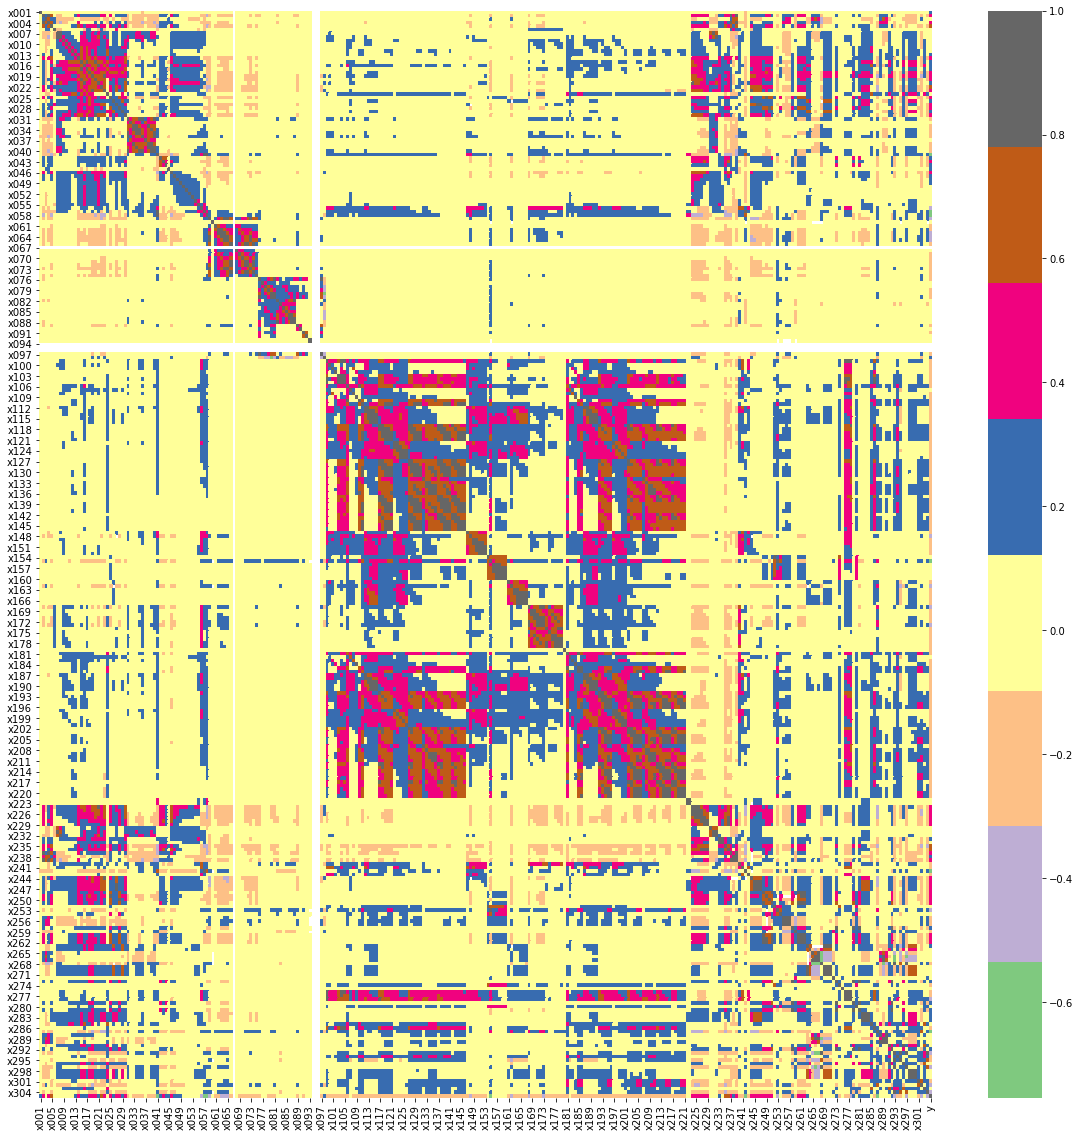

In [ ]:
matrix = df_credit_score_train[list(df_credit_score_train)].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(matrix,cmap="Accent")

the code below is covered by annotation so correl is not visible

matrix = df_credit_score[list(df_credit_score)].corr()
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(matrix,annot=True,cmap="Accent")

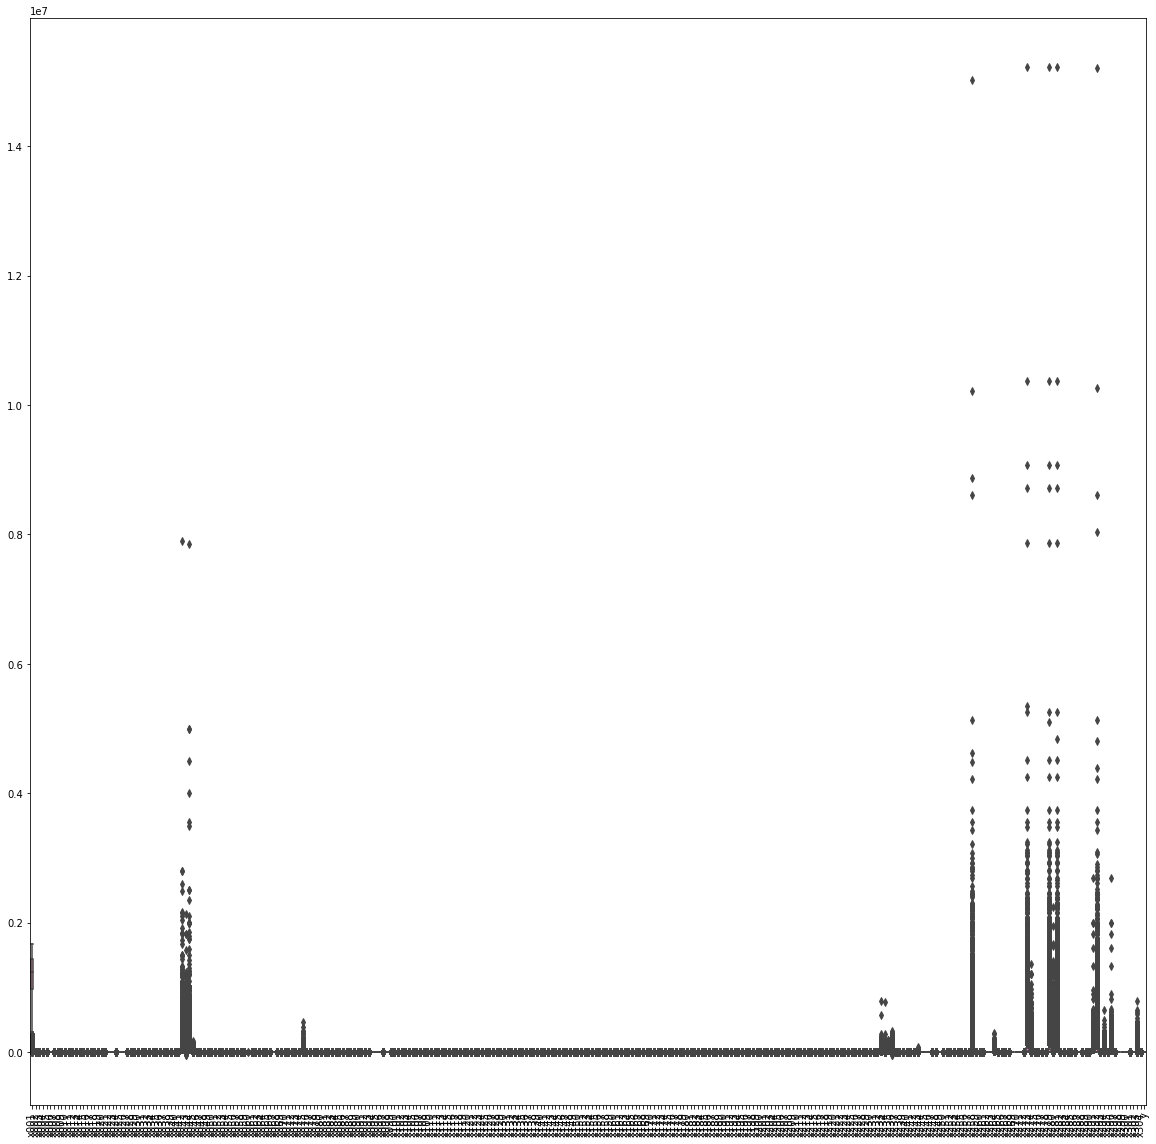

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_credit_score_train)
plt.xticks(rotation=90);

plot of missing credit score values 

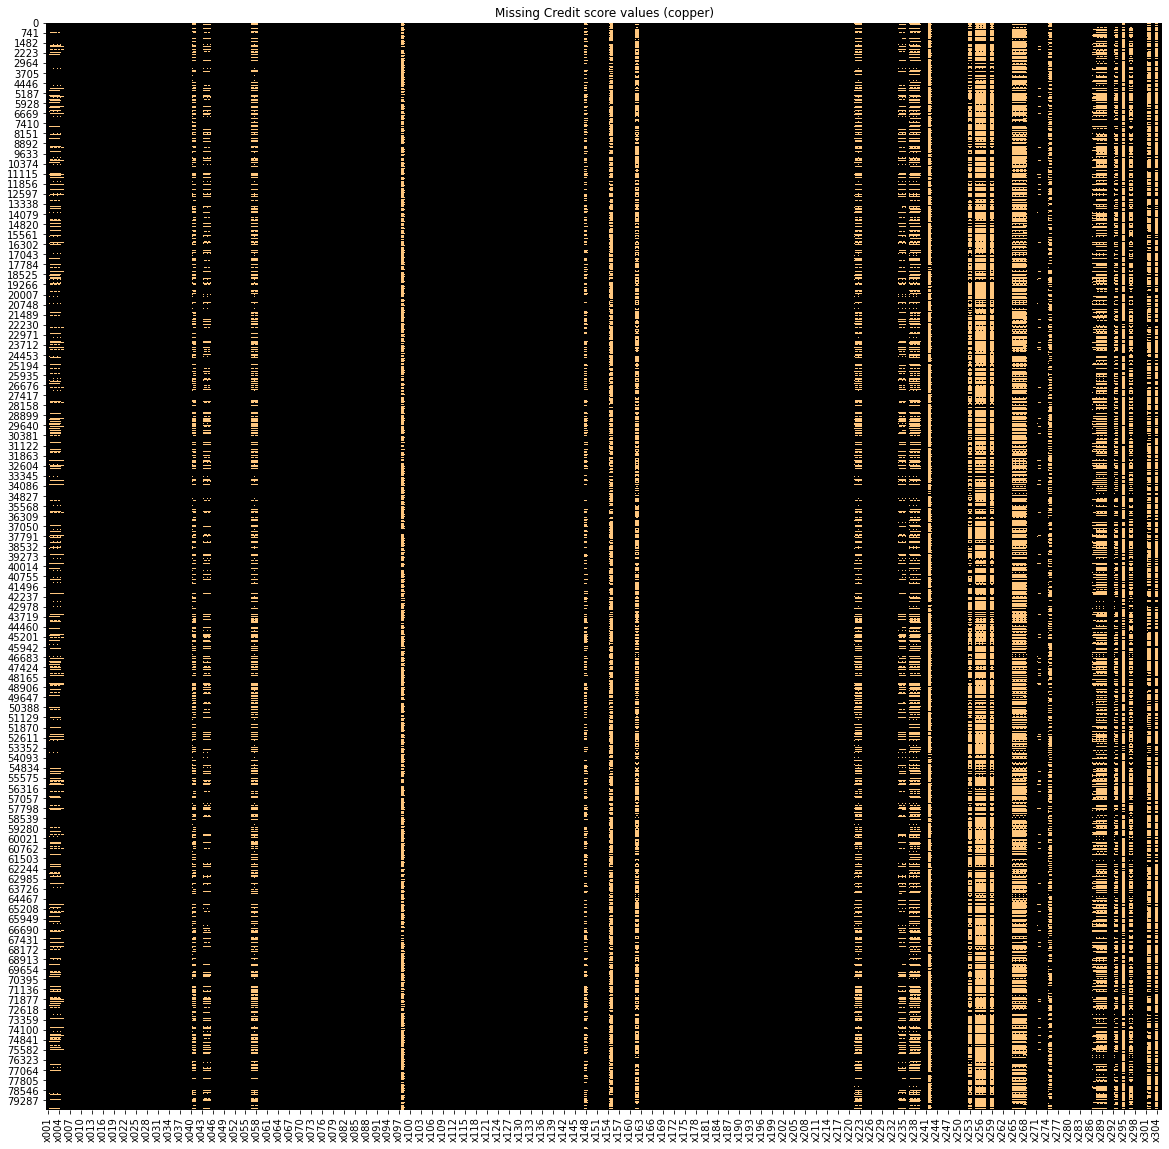

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_credit_score_train.isnull(), cmap = "copper", cbar = False)
plt.title("Missing Credit score values (copper)");

the cell was cancelled after running for over an hour

sns.pairplot(df_credit_score)

Since it's not a time series data we shouldn't use bfill or ffill to fill in the data, so let's merge test and train, drop columns that have less than 30% of data, fill the rest with mean and then normalise the data

In [ ]:
df_credit_score_train["train"] = 1
df_credit_score_test["train"] = 0

In [ ]:
df_credit_score_merged = pd.concat([df_credit_score_train,df_credit_score_test],axis=0)

In [ ]:
cols_over30 = []

In [ ]:
[cols_over30.append(i) for i in df_credit_score_merged.columns if df_credit_score_merged[i].isnull().sum()/df_credit_score_merged.shape[0]*100 > 30 ]
len(cols_over30)

31

In [ ]:
cols_over30

['x041',
 'x057',
 'x058',
 'x098',
 'x148',
 'x155',
 'x162',
 'x222',
 'x223',
 'x237',
 'x238',
 'x239',
 'x242',
 'x253',
 'x255',
 'x256',
 'x257',
 'x259',
 'x265',
 'x266',
 'x267',
 'x268',
 'x275',
 'x288',
 'x289',
 'x290',
 'x293',
 'x295',
 'x297',
 'x302',
 'x304']

In [ ]:
df_credit_score_merged.drop(cols_over30, axis=1, inplace=True)

In [ ]:
df_credit_score_merged.fillna(df_credit_score_merged.mean(), inplace = True)

Since the data types in raw files are not optimal I'll reduce amount of memory consumed
https://gist.github.com/eherrerosj/fdac2b3761a10332da163b1c90367890 (there was no point of doing it before if we were removing columns)

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
#df_credit_score_train = reduce_mem_usage(df_credit_score_train)
#df_credit_score_test = reduce_mem_usage(df_credit_score_test)
df_credit_score_merged = reduce_mem_usage(df_credit_score_merged)
gc.collect()

Mem. usage decreased to 38.43 Mb (81.7% reduction)


13674

In [ ]:
df_credit_score_merged

x001      x002       x003     x004  ...  x301   x303    y  train
0      1084094  426.0000  39.000000  128.000  ...     0      0  807      1
1      1287777  160.0000   2.000000   64.000  ...     0      0  819      1
2      1483016  163.0000  16.000000  104.000  ...     0      0  803      1
3       959054  125.6875  25.546875   65.375  ...     0      0  530      1
4      1342113    3.0000   2.000000    2.000  ...     0      0  485      1
...        ...       ...        ...      ...  ...   ...    ...  ...    ...
19995  1341378   51.0000   3.000000   18.000  ...     0      0  541      0
19996  1290822  187.0000  13.000000  107.000  ...     0      0  831      0
19997   795243   95.0000  19.000000   57.000  ...     0  30770  543      0
19998  1323781  125.6875  25.546875   65.375  ...     0      0  488      0
19999  1341326  125.6875  25.546875   65.375  ...     1      0  491      0

[100000 rows x 275 columns]

Let's make sure we're selecting only the right features

In [ ]:
X = df_credit_score_merged.drop(["y", "train"], axis=1)
Y = df_credit_score_merged["y"]

In [ ]:
X

x001      x002       x003     x004  ...  x299  x300  x301   x303
0      1084094  426.0000  39.000000  128.000  ...     0     0     0      0
1      1287777  160.0000   2.000000   64.000  ...     1     1     0      0
2      1483016  163.0000  16.000000  104.000  ...     0     0     0      0
3       959054  125.6875  25.546875   65.375  ...     1     1     0      0
4      1342113    3.0000   2.000000    2.000  ...     1     1     0      0
...        ...       ...        ...      ...  ...   ...   ...   ...    ...
19995  1341378   51.0000   3.000000   18.000  ...     1     1     0      0
19996  1290822  187.0000  13.000000  107.000  ...     1     1     0      0
19997   795243   95.0000  19.000000   57.000  ...     1     1     0  30770
19998  1323781  125.6875  25.546875   65.375  ...     1     1     0      0
19999  1341326  125.6875  25.546875   65.375  ...     0     0     1      0

[100000 rows x 273 columns]

In [ ]:
Y

0        807
1        819
2        803
3        530
4        485
        ... 
19995    541
19996    831
19997    543
19998    488
19999    491
Name: y, Length: 100000, dtype: int16

Following the guide from https://www.let-the-data-confess.com/feature-selection-using-genetic-algorithm/ let's select relevant features only

In [ ]:

random.seed(5)

estimator = linear_model.LinearRegression()

selector = GeneticSelectionCV(estimator,cv=5,
                                  verbose=1,
                                  scoring="r2", 
                                  max_features=10,
                                  n_population=100,
                                  crossover_proba=0.7,
                                  mutation_proba=0.1,
                                  n_generations=50,
                                  #crossover_independent_proba=0.5,
                                  #mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=5,
                                  caching=True,
                                  n_jobs=-1)
selector = selector.fit(X, Y)

print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                  	std                    	min              	max              
0  	100   	[-10000.      137.79]	[0.         8.12563228]	[-10000.    112.]	[-10000.    155.]
1  	75    	[-10000.      130.72]	[0.         6.34992913]	[-10000.    111.]	[-10000.    142.]
2  	79    	[-10000.     125.9]  	[0.         5.78532627]	[-10000.    107.]	[-10000.    140.]
3  	79    	[-10000.      121.28]	[0.        5.5210144]  	[-10000.    106.]	[-10000.    137.]
4  	82    	[-10000.      116.83]	[0.         4.64339316]	[-10000.    106.]	[-10000.    134.]
5  	71    	[-10000.      112.56]	[0.         3.95808034]	[-10000.    103.]	[-10000.    124.]
6  	72    	[-10000.     109.7]  	[0.         3.83796821]	[-10000.     98.]	[-10000.    122.]
7  	83    	[-10000.      106.61]	[0.         4.03706577]	[-10000.     96.]	[-10000.    117.]
8  	71    	[-10000.      103.27]	[0.        4.1324448]  	[-10000.     93.]	[-10000.    115.]
9  	77    	[-10000.      10

In [ ]:
selected_features=pd.DataFrame(selector.support_,index=X.columns)
selected_features = selected_features.rename(columns = {0:'selected'})
selected_features=selected_features[selected_features.selected==True]

In [ ]:
print(selected_features.shape)

(40, 1)


In [ ]:
selected_features

selected
x001      True
x002      True
x010      True
x024      True
x027      True
x029      True
x030      True
x043      True
x051      True
x061      True
x068      True
x075      True
x076      True
x077      True
x079      True
x090      True
x096      True
x099      True
x104      True
x106      True
x108      True
x111      True
x112      True
x118      True
x121      True
x129      True
x130      True
x136      True
x152      True
x153      True
x174      True
x175      True
x181      True
x201      True
x208      True
x231      True
x246      True
x274      True
x292      True
x299      True

In [ ]:
new_features = []

for feature in selected_features.index:
        new_features.append(feature)

new_features.append('y')
new_features.append('train')

In [ ]:
new_features

['x001',
 'x002',
 'x010',
 'x024',
 'x027',
 'x029',
 'x030',
 'x043',
 'x051',
 'x061',
 'x068',
 'x075',
 'x076',
 'x077',
 'x079',
 'x090',
 'x096',
 'x099',
 'x104',
 'x106',
 'x108',
 'x111',
 'x112',
 'x118',
 'x121',
 'x129',
 'x130',
 'x136',
 'x152',
 'x153',
 'x174',
 'x175',
 'x181',
 'x201',
 'x208',
 'x231',
 'x246',
 'x274',
 'x292',
 'x299',
 'y',
 'train']

In [ ]:
intersection_cols = df_credit_score_merged.columns & new_features
res = df_credit_score_merged[intersection_cols]
res = res.drop(['x002','x096'], axis = 1)

In [ ]:
res

x001  x010  x024  x027  x029  ...   x274    x292  x299    y  train
0      1084094     0     1     1     1  ...      0  346762     0  807      1
1      1287777     1     9     1     9  ...      0  124634     1  819      1
2      1483016     0     0     1     0  ...      0       0     0  803      1
3       959054     0     3     0     0  ...    619       0     1  530      1
4      1342113     0     3     1     3  ...  21424   17413     1  485      1
...        ...   ...   ...   ...   ...  ...    ...     ...   ...  ...    ...
19995  1341378     1     7     1     4  ...   6170   34379     1  541      0
19996  1290822     0     2     1     2  ...      0   19269     1  831      0
19997   795243     2    15     1     2  ...   7695   30770     1  543      0
19998  1323781     5     7     0     0  ...   1070       0     1  488      0
19999  1341326     0     1     0     0  ...      0       0     0  491      0

[100000 rows x 40 columns]

In [ ]:
#print(intersection_cols)
res.describe().T

count          mean            std  ...        50%         75%         max
x001   100000.0  1.218244e+06  272897.724977  ...  1235926.0  1445326.25   1677197.0
x010   100000.0  1.026990e+00       1.713823  ...        0.0        1.00        33.0
x024   100000.0  4.733060e+00       7.159681  ...        2.0        6.00       129.0
x027   100000.0  7.515200e-01       0.432134  ...        1.0        1.00         1.0
x029   100000.0  1.476120e+00       2.036195  ...        1.0        2.00        46.0
x030   100000.0  4.037540e+00       4.782564  ...        3.0        6.00       134.0
x043   100000.0  1.189835e+04   39502.627151  ...      300.0    10382.25   4885410.0
x051   100000.0  1.100900e-01       0.384359  ...        0.0        0.00         7.0
x061   100000.0  8.006000e-02       0.375356  ...        0.0        0.00        22.0
x068   100000.0  9.430000e-03       0.115677  ...        0.0        0.00         8.0
x075   100000.0  2.015257e+03    6377.425012  ...       83.0     1874.00    458940.0
x076   100000.0  3.240900e-01       0.937808  ...        0.0        0.00        60.0
x077   100000.0  3.460000e-03       0.059900  ...        0.0        0.00         3.0
x079   100000.0  3.841000e-02       0.233013  ...        0.0        0.00        20.0
x090   100000.0  1.731000e-02       0.130424  ...        0.0        0.00         1.0
x099   100000.0  2.565100e-01       0.939979  ...        0.0        0.00        29.0
x104   100000.0  1.645000e-01       0.784848  ...        0.0        0.00        27.0
x106   100000.0  5.632500e-01       1.540696  ...        0.0        1.00        32.0
x108   100000.0  9.031000e-02       0.399494  ...        0.0        0.00        14.0
x111   100000.0  2.893140e+00      10.842682  ...        0.0        0.00       428.0
x112   100000.0  1.968200e-01       0.739802  ...        0.0        0.00        16.0
x118   100000.0  1.025440e+00       4.195901  ...        0.0        0.00       185.0
x121   100000.0  2.775960e+00      10.538170  ...        0.0        0.00       428.0
x129   100000.0  1.190040e+00       6.169265  ...        0.0        0.00       280.0
x130   100000.0  1.600380e+00       8.054239  ...        0.0        0.00       328.0
x136   100000.0  4.284500e-01       2.352844  ...        0.0        0.00       104.0
x152   100000.0  3.003700e-01       1.457199  ...        0.0        0.00        54.0
x153   100000.0  3.299400e-01       1.586728  ...        0.0        0.00        54.0
x174   100000.0  2.995200e-01       0.851830  ...        0.0        0.00        18.0
x175   100000.0  4.220000e-02       0.287958  ...        0.0        0.00        13.0
x181   100000.0  1.353690e+00       2.668266  ...        0.0        2.00        58.0
x201   100000.0  6.327800e-01       2.140387  ...        0.0        0.00        64.0
x208   100000.0  2.112100e-01       1.097649  ...        0.0        0.00        44.0
x231   100000.0  4.713800e-01       1.171535  ...        0.0        1.00        43.0
x246   100000.0  7.372200e-01       0.440146  ...        1.0        1.00         1.0
x274   100000.0  4.942003e+03   29054.494651  ...        0.0      852.00   2699159.0
x292   100000.0  5.839332e+04  164530.463427  ...     4758.0    43331.25  15207929.0
x299   100000.0  5.580300e-01       0.496624  ...        1.0        1.00         1.0
y      100000.0  6.191982e+02     118.461932  ...      599.0      720.00       839.0
train  100000.0  8.000000e-01       0.400002  ...        1.0        1.00         1.0

[40 rows x 8 columns]

In [ ]:
def normalise(df):
    NormDF=((df-df.mean())/(df.std()))
    NormDF["train"]=df["train"]
    NormDF["y"]=df["y"]
    return NormDF

In [ ]:
df_credit_score_norm=normalise(res)

In [ ]:
df_credit_score_norm.T

0           1           2      ...       19997       19998       19999
x001    -0.491575    0.254796    0.970225  ...   -1.550034    0.386728    0.451019
x010    -0.599239   -0.015748   -0.599239  ...    0.567742    2.318214   -0.599239
x024    -0.521400    0.595968   -0.661071  ...    1.433994    0.316626   -0.521400
x027     0.575007    0.575007    0.575007  ...    0.575007   -1.739091   -1.739091
x029    -0.233828    3.695068   -0.724940  ...    0.257284   -0.724940   -0.724940
x030     0.201244    0.410336   -0.007849  ...   -0.635128   -0.844221   -0.844221
x043     1.219530    0.314628    0.070771  ...   -0.301204   -0.301204   -0.301204
x051    -0.286425   -0.286425   -0.286425  ...   -0.286425   -0.286425   -0.286425
x061    -0.213291   -0.213291   -0.213291  ...    5.114990   -0.213291   -0.213291
x068    -0.081520   -0.081520   -0.081520  ...   -0.081520   -0.081520   -0.081520
x075    -0.315999   -0.315999   -0.315999  ...    0.874451    0.008898   -0.063859
x076    -0.345582   -0.345582   -0.345582  ...    2.853366    0.720734   -0.345582
x077    -0.057763   -0.057763   -0.057763  ...   -0.057763   -0.057763   -0.057763
x079    -0.164840   -0.164840   -0.164840  ...    4.126760   -0.164840   -0.164840
x090    -0.132721   -0.132721   -0.132721  ...   -0.132721   -0.132721   -0.132721
x099    -0.272889   -0.272889   -0.272889  ...   -0.272889   -0.272889   -0.272889
x104    -0.209595   -0.209595   -0.209595  ...   -0.209595   -0.209595   -0.209595
x106    -0.365582   -0.365582   -0.365582  ...    5.475935   -0.365582   -0.365582
x108    -0.226061   -0.226061   -0.226061  ...   -0.226061   -0.226061   -0.226061
x111    -0.266829   -0.266829   -0.266829  ...    5.820226   -0.266829   -0.266829
x112    -0.266044   -0.266044   -0.266044  ...   -0.266044   -0.266044   -0.266044
x118    -0.244391   -0.244391   -0.244391  ...    5.475477   -0.244391   -0.244391
x121    -0.263420   -0.263420   -0.263420  ...    5.619955   -0.263420   -0.263420
x129    -0.192898   -0.192898   -0.192898  ...    8.884359   -0.192898   -0.192898
x130    -0.198700   -0.198700   -0.198700  ...    6.754160   -0.198700   -0.198700
x136    -0.182099   -0.182099   -0.182099  ...    3.218041   -0.182099   -0.182099
x152    -0.206128   -0.206128   -0.206128  ...   -0.206128   -0.206128   -0.206128
x153    -0.207937   -0.207937   -0.207937  ...   -0.207937   -0.207937   -0.207937
x174    -0.351619   -0.351619   -0.351619  ...    0.822323   -0.351619   -0.351619
x175    -0.146549   -0.146549   -0.146549  ...   -0.146549   -0.146549   -0.146549
x181    -0.507329   -0.507329   -0.507329  ...    2.865647   -0.507329   -0.507329
x201    -0.295638   -0.295638   -0.295638  ...    2.507594   -0.295638   -0.295638
x208    -0.192420   -0.192420   -0.192420  ...   -0.192420   -0.192420   -0.192420
x231    -0.402361   -0.402361   -0.402361  ...   -0.402361   -0.402361   -0.402361
x246     0.597029    0.597029    0.597029  ...    0.597029   -1.674944   -1.674944
x274    -0.170094   -0.170094   -0.170094  ...    0.094753   -0.133267   -0.170094
x292     1.752677    0.402604   -0.354909  ...   -0.167892   -0.354909   -0.354909
x299    -1.123648    0.889950   -1.123648  ...    0.889950    0.889950   -1.123648
y      807.000000  819.000000  803.000000  ...  543.000000  488.000000  491.000000
train    1.000000    1.000000    1.000000  ...    0.000000    0.000000    0.000000

[40 rows x 100000 columns]

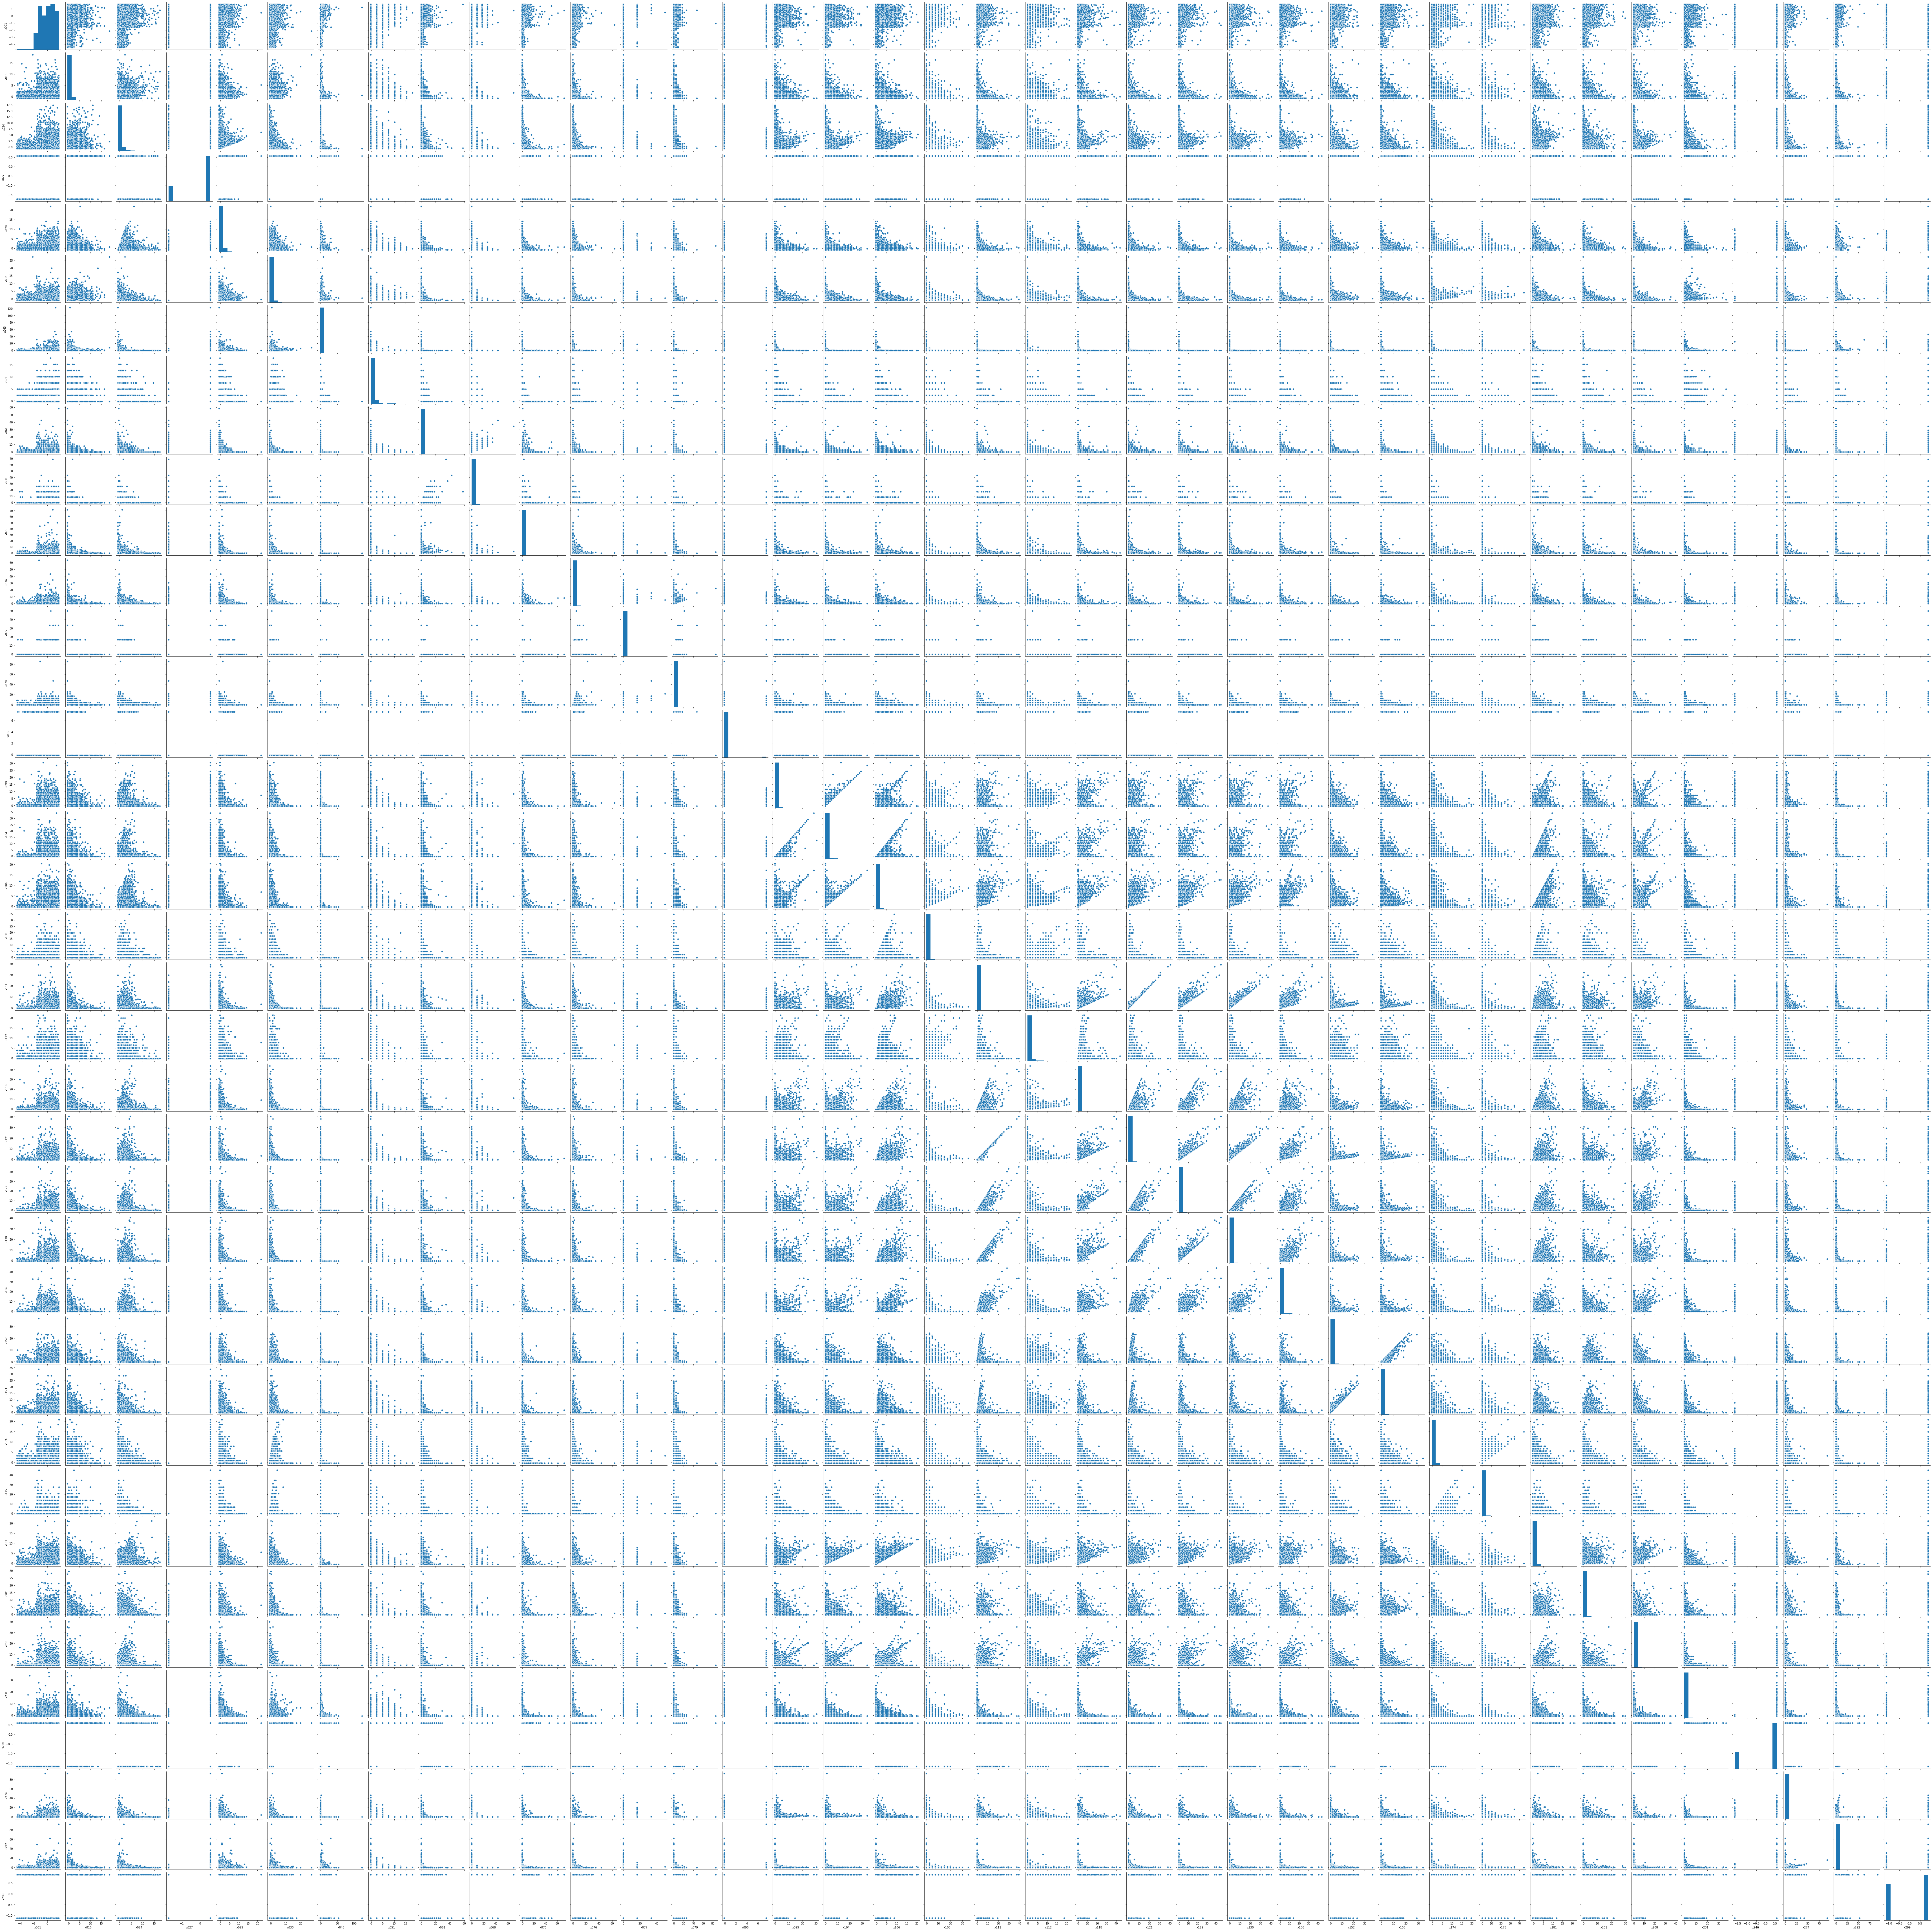

In [ ]:
sns.pairplot(df_credit_score_norm.drop(['y', 'train'], axis = 1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

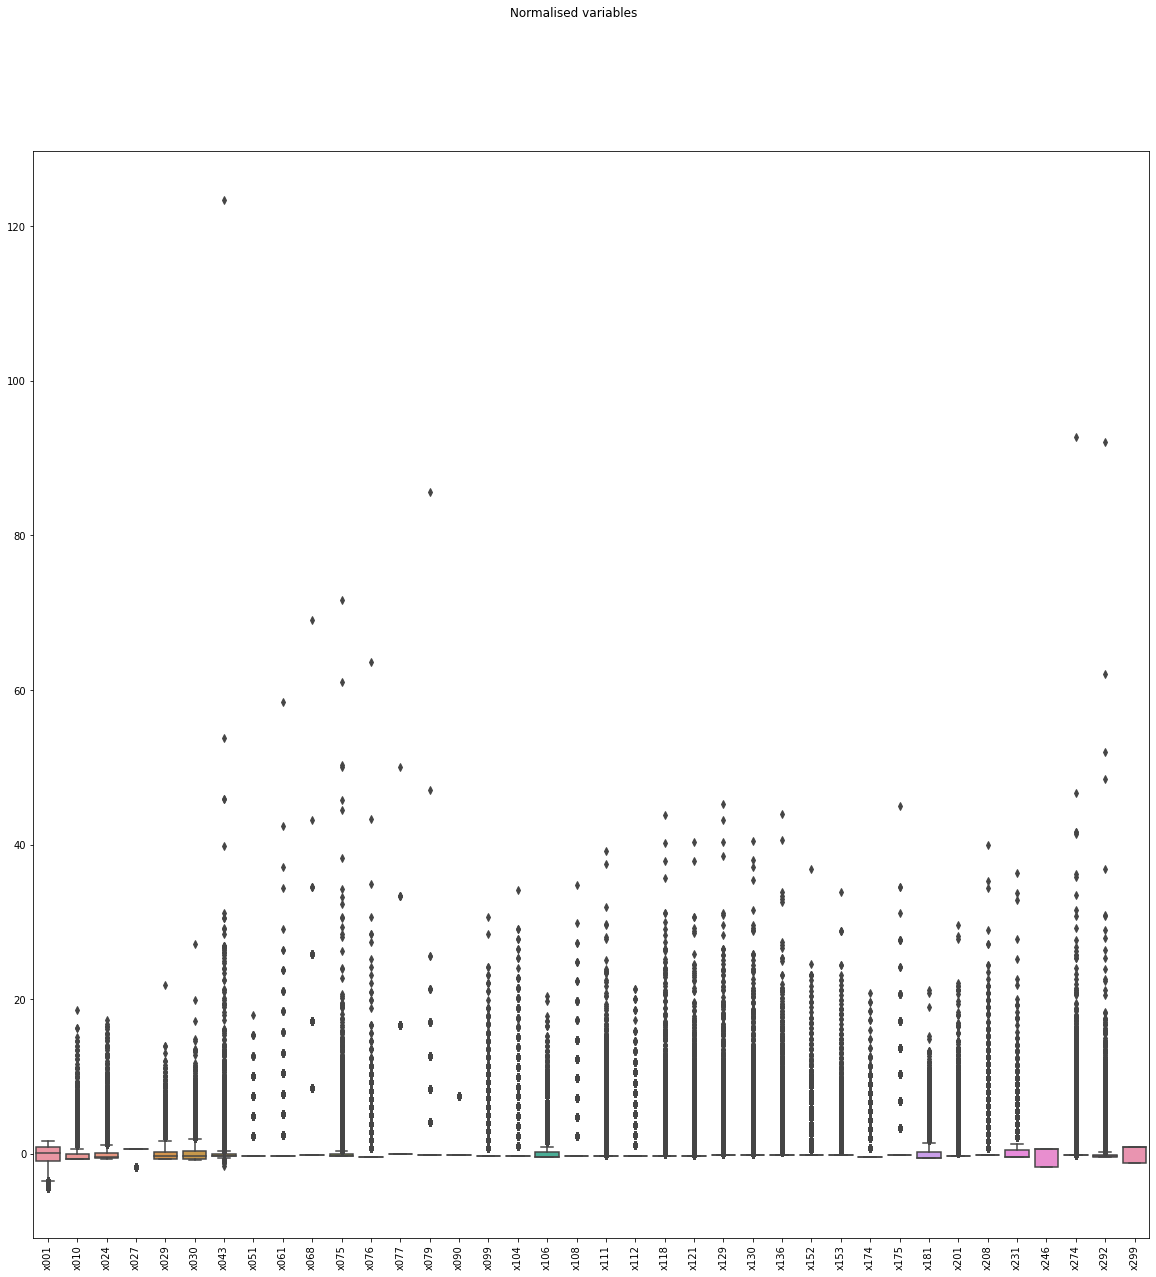

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('Normalised variables')
sns.boxplot(data=df_credit_score_norm.drop(['y', 'train'], axis = 1))
plt.xticks(rotation=90)

In [ ]:
df_credit_score_train = df_credit_score_norm[df_credit_score_norm['train']==1]
df_credit_score_test = df_credit_score_norm[df_credit_score_norm['train']!=1]
x_train = df_credit_score_train.drop(['y','train'],axis = 1)
y_train = df_credit_score_train['y']
x_test = df_credit_score_test.drop(['y','train'],axis = 1)
y_test = df_credit_score_test['y']

Random Forest and XGBoost have similar Rsq results in CV - let's run both methods and evaluate 3 metrics: MAPE, MAE and R sq

First we need to define MAPE function since it's not out of box in sklearn. https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069

Unfortunately MAPE crashes the notebook so it won't be used

In [ ]:
#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
XGBoost_model = XGBRegressor(objective ='reg:squarederror')
XGBoost_model.fit(x_train,y_train)
XGBoost_model_prediction_train = XGBoost_model.predict(x_train)
XGBoost_model_prediction_train = pd.DataFrame(XGBoost_model_prediction_train, columns = ['cred_score_pred'])

rsq_train_XGBoost = metrics.r2_score(y_train, XGBoost_model_prediction_train)
MAE_train_XGBoost = metrics.mean_absolute_error(y_train, XGBoost_model_prediction_train)
#MAPE_train_XGBoost = mean_absolute_percentage_error(y_train, XGBoost_model_prediction_train)
print('Train Statistics XGBoost: R sq -', round(rsq_train_XGBoost, 4), ', MAE -', MAE_train_XGBoost)

Train Statistics XGBoost: R sq - 0.8482 , MAE - 35.028915


XGBoost_model = XGBRegressor(objective ='reg:squarederror')
XGBoost_model.fit(x_train,y_train)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

error_percent = np.mean(np.abs((y_train - train_predict) / y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
y_train, train_predict = np.array(y_train), np.array(train_predict)

In [ ]:
XGBoost_model_prediction_test = XGBoost_model.predict(x_test)

rsq_test_XGBoost = metrics.r2_score(y_test, XGBoost_model_prediction_test)
MAE_test_XGBoost = metrics.mean_absolute_error(y_test, XGBoost_model_prediction_test)
#MAPE_test_XGBoost = mean_absolute_percentage_error(y_test, XGBoost_model_prediction_test)
print('Test Statistics XGBoost: R sq -', round(rsq_test_XGBoost, 4), ', MAE -', MAE_test_XGBoost)
gc.collect()

Test Statistics XGBoost: R sq - 0.8468 , MAE - 35.331184


176059

In [ ]:
RFR_model = RandomForestRegressor()
RFR_model.fit(x_train,y_train)

RFR_model_prediction_train = RFR_model.predict(x_train)
RFR_model_prediction_train = pd.DataFrame(RFR_model_prediction_train, columns = ['cred_score_pred'])

rsq_train_RFR = metrics.r2_score(y_train, RFR_model_prediction_train)
MAE_train_RFR = metrics.mean_absolute_error(y_train, RFR_model_prediction_train)
#MAPE_train_RFR = mean_absolute_percentage_error(y_train, RFR_model_prediction_train)
print('Train Statistics RFR: R sq -', round(rsq_train_RFR, 4), ', MAE -', MAE_train_RFR)

Train Statistics RFR: R sq - 0.9819 , MAE - 11.7183645


In [ ]:
RFR_model_prediction_test = RFR_model.predict(x_test)

rsq_test_RFR = metrics.r2_score(y_test, RFR_model_prediction_test)
MAE_test_RFR = metrics.mean_absolute_error(y_test, RFR_model_prediction_test)
#MAPE_test_RFR = mean_absolute_percentage_error(y_test, RFR_model_prediction_test)
print('Test Statistics RFR: R sq -', round(rsq_test_RFR, 4), ', MAE -', MAE_test_RFR)

Test Statistics RFR: R sq - 0.8706 , MAE - 31.632156


In [ ]:
#model = RandomForestRegressor()
#model.fit(x_test,y_test)

#print("Intercept : ", RFR_model.intercept_)
#print("Slope : ", RFR_model.coef_)

#Predicting TEST & TRAIN DATA
#train_predict = model.predict(X_train)
#test_predict = model.predict(x_test)

#error_percent = np.mean(np.abs((y_test - test_predict) / y_test)) * 100
#print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
#y_test, test_predict = np.array(y_test), np.array(test_predict)

Let's compare it to neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2496      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 23,297
Trainable params: 23,297
Non-trainable params: 0
_________________________________________________________________


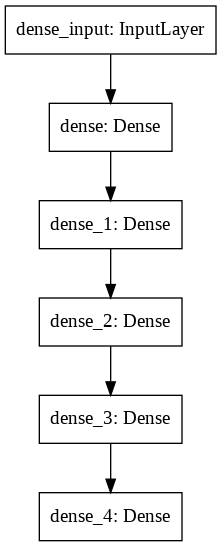

In [ ]:
#Let's create the first neural network model with 3 hidden layers

np.random.seed(0)
NN_model = Sequential()
#Input
NN_model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
#hidden
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(64, activation='relu'))
#Output
NN_model.add(Dense(1, activation='linear'))

NN_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_model.summary()
keras.utils.plot_model(NN_model)

In [ ]:
nepoch = 25 #reduced from 20 since that is when we are getting the best results
#nbatch = 16
NN_model.fit(x_train, y_train, epochs=nepoch) #, batch_size=nbatch

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 15406.1133 - mse: 15406.1133 - mae: 72.2180 - mape: 12.0854
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 3191.7192 - mse: 3191.7192 - mae: 43.3922 - mape: 7.3175
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2717.4966 - mse: 2717.4966 - mae: 39.9843 - mape: 6.7441
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2586.4199 - mse: 2586.4199 - mae: 39.0782 - mape: 6.5852
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2476.0261 - mse: 2476.0261 - mae: 38.1344 - mape: 6.4182
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2386.1133 - mse: 2386.1133 - mae: 37.4023 - mape: 6.2904
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2343.4043 - mse: 2343.4043 - mae: 36.9814 - mape: 6.2182
Epoch 8/25
2500/2500 [==============================] - 3s 1ms/ste

In [ ]:
gc.collect()

1414

In [ ]:
NN_model_prediction_train = NN_model.predict(x_train)
NN_model_prediction_train = pd.DataFrame(NN_model_prediction_train, columns = ['cred_score_pred'])

In [ ]:
gc.collect()

669

In [ ]:
NN_rsq_train = metrics.r2_score(y_train, NN_model_prediction_train)
NN_MAE_train = metrics.mean_absolute_error(y_train, NN_model_prediction_train)

print(NN_rsq_train)
print(NN_MAE_train)

0.8589685031356532
33.550556


In [ ]:
NN_model_prediction_test = NN_model.predict(x_test)
NN_model_prediction_test = pd.DataFrame(NN_model_prediction_test, columns = ['cred_score_pred'])

NN_rsq_test = metrics.r2_score(y_test, NN_model_prediction_test)
NN_MAE_test = metrics.mean_absolute_error(y_test, NN_model_prediction_test)

print(NN_rsq_test)
print(NN_MAE_test)

0.8473739928802102
34.86608


In [ ]:
NN_val_model = NN_model

In [ ]:
#with validation in ANN
nepoch = 25
NN_val_model.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch

Epoch 1/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2038.3394 - mse: 2038.3394 - mae: 34.2746 - mape: 5.7353 - val_loss: 2169.6687 - val_mse: 2169.6687 - val_mae: 34.9369 - val_mape: 5.8447
Epoch 2/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2025.4310 - mse: 2025.4310 - mae: 34.1226 - mape: 5.7102 - val_loss: 2218.3066 - val_mse: 2218.3066 - val_mae: 35.0568 - val_mape: 5.9290
Epoch 3/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2022.7886 - mse: 2022.7886 - mae: 34.0644 - mape: 5.6995 - val_loss: 2117.2197 - val_mse: 2117.2197 - val_mae: 34.7668 - val_mape: 5.8269
Epoch 4/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2009.0229 - mse: 2009.0229 - mae: 33.9863 - mape: 5.6869 - val_loss: 2317.7334 - val_mse: 2317.7334 - val_mae: 36.9889 - val_mape: 6.0535
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2004.4164 - mse: 2004.4164 - mae: 33.9656 - mape: 5.6823 - val_loss:

In [ ]:
NN_val_model_prediction_train = NN_val_model.predict(x_train)
NN_val_model_prediction_train = pd.DataFrame(NN_val_model_prediction_train, columns = ['cred_score_pred'])
NN_val_rsq_train = metrics.r2_score(y_train, NN_val_model_prediction_train)
NN_val_MAE_train = metrics.mean_absolute_error(y_train, NN_val_model_prediction_train)

print(NN_val_rsq_train)
print(NN_val_MAE_train)

0.8710051840029662
32.022976


In [ ]:
NN_val_model_prediction_test = NN_val_model.predict(x_test)
NN_val_model_prediction_test = pd.DataFrame(NN_val_model_prediction_test, columns = ['cred_score_pred'])
NN_val_rsq_test = metrics.r2_score(y_test, NN_val_model_prediction_test)
NN_val_MAE_test = metrics.mean_absolute_error(y_test, NN_val_model_prediction_test)

print(NN_val_rsq_test)
print(NN_val_MAE_test)

0.8518944654179468
34.352364


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 38)                1482      
_________________________________________________________________
dense_6 (Dense)              (None, 76)                2964      
_________________________________________________________________
dense_7 (Dense)              (None, 152)               11704     
_________________________________________________________________
dense_8 (Dense)              (None, 76)                11628     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 77        
Total params: 27,855
Trainable params: 27,855
Non-trainable params: 0
_________________________________________________________________


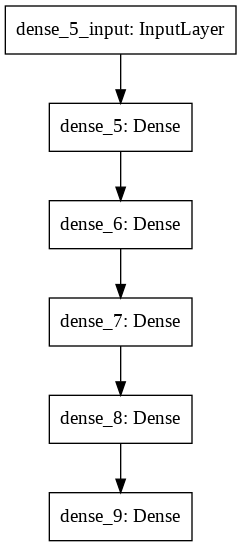

In [ ]:
#same shape as shape of data
np.random.seed(0)
NN_val_shp_model = Sequential()
#Input
NN_val_shp_model.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
#hidden
NN_val_shp_model.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_model.add(Dense(x_train.shape[1]*2, activation='relu'))
#Output
NN_val_shp_model.add(Dense(1, activation='linear'))

NN_val_shp_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_val_shp_model.summary()
keras.utils.plot_model(NN_val_shp_model)

In [ ]:
start = time.time()
nepoch = 25
NN_val_shp_model.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch
end = time.time()

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 16139.6865 - mse: 16139.6865 - mae: 74.4281 - mape: 12.4527 - val_loss: 3890.0703 - val_mse: 3890.0703 - val_mae: 48.0759 - val_mape: 7.9923
Epoch 2/25
2500/2500 [==============================] - 4s 2ms/step - loss: 3214.2546 - mse: 3214.2546 - mae: 43.6560 - mape: 7.3522 - val_loss: 2853.7156 - val_mse: 2853.7156 - val_mae: 41.2899 - val_mape: 6.8654
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2722.0300 - mse: 2722.0300 - mae: 40.0664 - mape: 6.7465 - val_loss: 2609.3132 - val_mse: 2609.3132 - val_mae: 38.9738 - val_mape: 6.5680
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2532.8953 - mse: 2532.8953 - mae: 38.6629 - mape: 6.5107 - val_loss: 2460.0815 - val_mse: 2460.0815 - val_mae: 37.3566 - val_mape: 6.3312
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 2446.6399 - mse: 2446.6399 - mae: 37.9023 - mape: 6.3793 - val_lo

In [ ]:
processing_time = end - start
#print(str(datetime.timedelta(seconds=processing_time)))
print("NN_val_shp_model :", str(datetime.timedelta(seconds=processing_time)))

NN_val_shp_model : 0:01:43.275623


In [ ]:
NN_val_shp_model_prediction_train = NN_val_shp_model.predict(x_train)
NN_val_shp_model_prediction_train = pd.DataFrame(NN_val_shp_model_prediction_train, columns = ['cred_score_pred'])
NN_val_shp_rsq_train = metrics.r2_score(y_train, NN_val_shp_model_prediction_train)
NN_val_shp_MAE_train = metrics.mean_absolute_error(y_train, NN_val_shp_model_prediction_train)

print(NN_val_shp_rsq_train)
print(NN_val_shp_MAE_train)

0.8612111283996132
33.090717


In [ ]:
NN_val_shp_model_prediction_test = NN_val_shp_model.predict(x_test)
NN_val_shp_model_prediction_test = pd.DataFrame(NN_val_shp_model_prediction_test, columns = ['cred_score_pred'])
NN_val_shp_rsq_test = metrics.r2_score(y_test, NN_val_shp_model_prediction_test)
NN_val_shp_MAE_test = metrics.mean_absolute_error(y_test, NN_val_shp_model_prediction_test)

print(NN_val_shp_rsq_test)
print(NN_val_shp_MAE_test)

0.8518182206693641
34.308647


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 38)                1482      
_________________________________________________________________
dense_11 (Dense)             (None, 76)                2964      
_________________________________________________________________
batch_normalization (BatchNo (None, 76)                304       
_________________________________________________________________
dense_12 (Dense)             (None, 152)               11704     
_________________________________________________________________
batch_normalization_1 (Batch (None, 152)               608       
_________________________________________________________________
dense_13 (Dense)             (None, 76)                11628     
_________________________________________________________________
batch_normalization_2 (Batch (None, 76)               

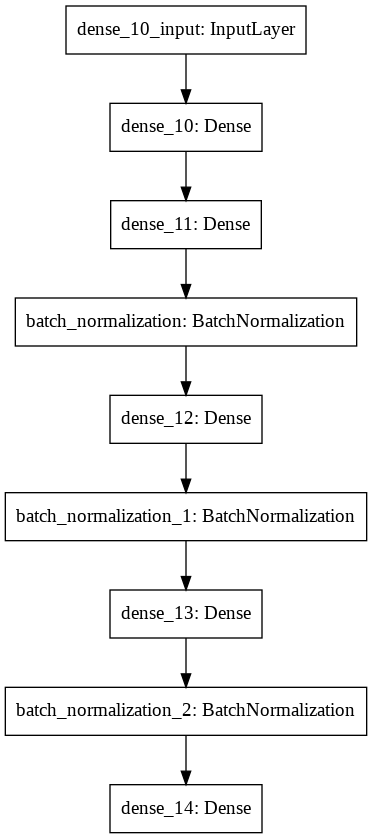

In [ ]:
#normalised
np.random.seed(0)
NN_val_shp_model_norm = Sequential()
#Input
NN_val_shp_model_norm.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
#NN_val_shp_model_norm.add(BatchNormalization())
#hidden
NN_val_shp_model_norm.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_model_norm.add(BatchNormalization())
NN_val_shp_model_norm.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_model_norm.add(BatchNormalization())
NN_val_shp_model_norm.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_model_norm.add(BatchNormalization())
#Output
NN_val_shp_model_norm.add(Dense(1, activation='linear'))
#NN_val_shp_model_norm.add(BatchNormalization())

NN_val_shp_model_norm.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_val_shp_model_norm.summary()
keras.utils.plot_model(NN_val_shp_model_norm)

In [ ]:
nepoch = 25
start = time.time()
NN_val_shp_model_norm.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch
end = time.time()

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 173511.1719 - mse: 173511.1719 - mae: 364.9739 - mape: 59.9857 - val_loss: 4911.0317 - val_mse: 4911.0317 - val_mae: 57.0840 - val_mape: 9.0648
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2896.4153 - mse: 2896.4153 - mae: 41.9720 - mape: 6.9986 - val_loss: 2472.9072 - val_mse: 2472.9072 - val_mae: 37.9639 - val_mape: 6.3880
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2663.8147 - mse: 2663.8147 - mae: 40.0354 - mape: 6.7455 - val_loss: 2560.6934 - val_mse: 2560.6934 - val_mae: 38.6567 - val_mape: 6.4929
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2602.6099 - mse: 2602.6099 - mae: 39.5505 - mape: 6.6656 - val_loss: 2415.4280 - val_mse: 2415.4280 - val_mae: 37.8787 - val_mape: 6.3724
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2553.3103 - mse: 2553.3103 - mae: 39.1982 - mape: 6.5998 - val

In [ ]:
#shap.initjs()
#h=NN_val_shp_model_norm.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test))


In [ ]:
processing_time = end - start
#print(str(datetime.timedelta(seconds=processing_time)))
print("NN_val_shp_model_norm :", str(datetime.timedelta(seconds=processing_time)))

NN_val_shp_model_norm : 0:02:13.304895


In [ ]:
#background = x_train[np.random.choice(x_train.shape[0],100, replace=False)]
#explainer = shap.DeepExplainer(NN_val_shp_model_norm, background)

In [ ]:
NN_val_shp_model_norm_prediction_train = NN_val_shp_model_norm.predict(x_train)
NN_val_shp_model_norm_prediction_train = pd.DataFrame(NN_val_shp_model_norm_prediction_train, columns = ['cred_score_pred'])
NN_val_shp_norm_rsq_train = metrics.r2_score(y_train, NN_val_shp_model_norm_prediction_train)
NN_val_shp_norm_MAE_train = metrics.mean_absolute_error(y_train, NN_val_shp_model_norm_prediction_train)

print(NN_val_shp_norm_rsq_train)
print(NN_val_shp_norm_MAE_train)

0.8624157735899435
33.291306


In [ ]:
NN_val_shp_model_norm_prediction_test = NN_val_shp_model_norm.predict(x_test)
NN_val_shp_model_norm_prediction_test = pd.DataFrame(NN_val_shp_model_norm_prediction_test, columns = ['cred_score_pred'])
NN_val_shp_norm_rsq_test = metrics.r2_score(y_test, NN_val_shp_model_norm_prediction_test)
NN_val_shp_norm_MAE_test = metrics.mean_absolute_error(y_test, NN_val_shp_model_norm_prediction_test)

print(NN_val_shp_norm_rsq_test)
print(NN_val_shp_norm_MAE_test)

0.8506459055441907
34.601425


normalisation so far is the a way to go

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 38)                1482      
_________________________________________________________________
dense_16 (Dense)             (None, 76)                2964      
_________________________________________________________________
batch_normalization_3 (Batch (None, 76)                304       
_________________________________________________________________
dense_17 (Dense)             (None, 152)               11704     
_________________________________________________________________
batch_normalization_4 (Batch (None, 152)               608       
_________________________________________________________________
dense_18 (Dense)             (None, 76)                11628     
_________________________________________________________________
batch_normalization_5 (Batch (None, 76)               

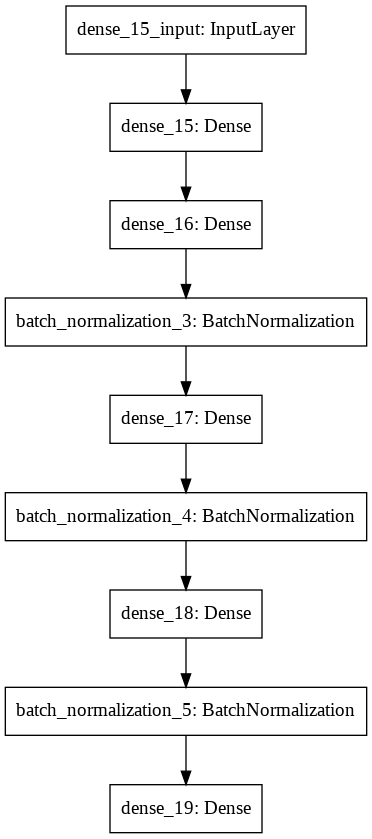

In [ ]:
#normalised sigmoid
np.random.seed(0)
NN_val_shp_model_norm_sig = Sequential()
#Input
NN_val_shp_model_norm_sig.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
#NN_val_shp_model_norm_sig.add(BatchNormalization())
#hidden
NN_val_shp_model_norm_sig.add(Dense(x_train.shape[1]*2, activation='sigmoid'))
NN_val_shp_model_norm_sig.add(BatchNormalization())
NN_val_shp_model_norm_sig.add(Dense(x_train.shape[1]*4, activation='sigmoid'))
NN_val_shp_model_norm_sig.add(BatchNormalization())
NN_val_shp_model_norm_sig.add(Dense(x_train.shape[1]*2, activation='sigmoid'))
NN_val_shp_model_norm_sig.add(BatchNormalization())
#Output
NN_val_shp_model_norm_sig.add(Dense(1, activation='linear'))
#NN_val_shp_model_norm_sig.add(BatchNormalization())

NN_val_shp_model_norm_sig.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_val_shp_model_norm_sig.summary()
keras.utils.plot_model(NN_val_shp_model_norm_sig)

In [ ]:
nepoch = 25
start = time.time()
NN_val_shp_model_norm_sig.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch
end = time.time()

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 173304.5469 - mse: 173304.5469 - mae: 365.1305 - mape: 60.0344 - val_loss: 4868.9810 - val_mse: 4868.9810 - val_mae: 58.1004 - val_mape: 9.1899
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2975.0989 - mse: 2975.0989 - mae: 42.4159 - mape: 7.0789 - val_loss: 2408.7639 - val_mse: 2408.7639 - val_mae: 36.8093 - val_mape: 6.2299
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2668.4497 - mse: 2668.4497 - mae: 39.9750 - mape: 6.7383 - val_loss: 2329.6509 - val_mse: 2329.6509 - val_mae: 37.5823 - val_mape: 6.3154
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2610.7759 - mse: 2610.7759 - mae: 39.5605 - mape: 6.6591 - val_loss: 2266.3245 - val_mse: 2266.3245 - val_mae: 36.0175 - val_mape: 6.1461
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2557.9238 - mse: 2557.9238 - mae: 39.1257 - mape: 6.5906 - val

In [ ]:
processing_time = end - start
#print(str(datetime.timedelta(seconds=processing_time)))
print("NN_val_shp_model_norm_sig :", str(datetime.timedelta(seconds=processing_time)))

NN_val_shp_model_norm_sig : 0:02:17.637037


In [ ]:
NN_val_shp_model_norm_sig_prediction_train = NN_val_shp_model_norm_sig.predict(x_train)
NN_val_shp_model_norm_sig_prediction_train = pd.DataFrame(NN_val_shp_model_norm_sig_prediction_train, columns = ['cred_score_pred'])
NN_val_shp_model_norm_sig_rsq_train = metrics.r2_score(y_train, NN_val_shp_model_norm_sig_prediction_train)
NN_val_shp_model_norm_sig_MAE_train = metrics.mean_absolute_error(y_train, NN_val_shp_model_norm_sig_prediction_train)

print(NN_val_shp_model_norm_sig_rsq_train)
print(NN_val_shp_model_norm_sig_MAE_train)

0.8660570585700912
32.647755


In [ ]:
NN_val_shp_model_norm_sig_prediction_test = NN_val_shp_model_norm_sig.predict(x_test)
NN_val_shp_model_norm_sig_prediction_test = pd.DataFrame(NN_val_shp_model_norm_sig_prediction_test, columns = ['cred_score_pred'])
NN_val_shp_model_norm_sig_rsq_test = metrics.r2_score(y_test, NN_val_shp_model_norm_sig_prediction_test)
NN_val_shp_model_norm_sig_MAE_test = metrics.mean_absolute_error(y_test, NN_val_shp_model_norm_sig_prediction_test)

print(NN_val_shp_model_norm_sig_rsq_test)
print(NN_val_shp_model_norm_sig_MAE_test)

0.8535277999735383
34.159233


sigmoid activation improved results

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 38)                1482      
_________________________________________________________________
dense_21 (Dense)             (None, 76)                2964      
_________________________________________________________________
batch_normalization_6 (Batch (None, 76)                304       
_________________________________________________________________
dense_22 (Dense)             (None, 152)               11704     
_________________________________________________________________
batch_normalization_7 (Batch (None, 152)               608       
_________________________________________________________________
dense_23 (Dense)             (None, 76)                11628     
_________________________________________________________________
batch_normalization_8 (Batch (None, 76)               

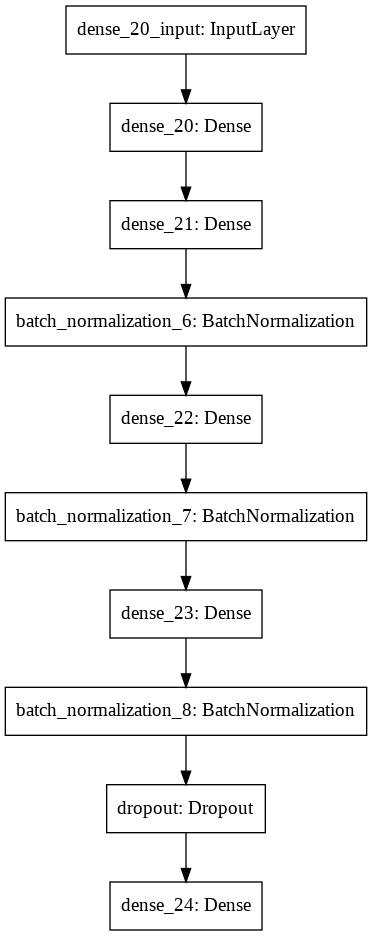

In [ ]:
#with dropout
np.random.seed(0)
NN_val_shp_model_norm_drop = Sequential()
#Input
NN_val_shp_model_norm_drop.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
#hidden
NN_val_shp_model_norm_drop.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_model_norm_drop.add(BatchNormalization())
NN_val_shp_model_norm_drop.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_model_norm_drop.add(BatchNormalization())
NN_val_shp_model_norm_drop.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_model_norm_drop.add(BatchNormalization())
#Output
#NN_val_shp_model_norm_drop.add(Dropout(0.35))
NN_val_shp_model_norm_drop.add(Dropout(0.2))
NN_val_shp_model_norm_drop.add(Dense(1, activation='linear'))

NN_val_shp_model_norm_drop.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_val_shp_model_norm_drop.summary()
keras.utils.plot_model(NN_val_shp_model_norm_drop)

In [ ]:
NN_val_shp_model_norm_drop.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 176696.4375 - mse: 176696.4375 - mae: 369.9808 - mape: 60.7701 - val_loss: 5527.8926 - val_mse: 5527.8926 - val_mae: 62.2289 - val_mape: 9.8655
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4555.5474 - mse: 4555.5474 - mae: 53.1958 - mape: 8.8044 - val_loss: 2536.9341 - val_mse: 2536.9341 - val_mae: 38.2793 - val_mape: 6.4351
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4223.2295 - mse: 4223.2295 - mae: 51.1042 - mape: 8.5051 - val_loss: 2731.2139 - val_mse: 2731.2139 - val_mae: 41.2421 - val_mape: 6.6922
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4074.6033 - mse: 4074.6033 - mae: 50.2246 - mape: 8.3594 - val_loss: 2395.0649 - val_mse: 2395.0649 - val_mae: 37.4242 - val_mape: 6.2535
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4021.2412 - mse: 4021.2412 - mae: 49.8444 - mape: 8.2840 - val

In [ ]:
NN_val_shp_model_norm_drop_prediction_train = NN_val_shp_model_norm_drop.predict(x_train)
NN_val_shp_model_norm_drop_prediction_train = pd.DataFrame(NN_val_shp_model_norm_drop_prediction_train, columns = ['cred_score_pred'])
NN_val_shp_model_norm_drop_rsq_train = metrics.r2_score(y_train, NN_val_shp_model_norm_drop_prediction_train)
NN_val_shp_model_norm_drop_MAE_train = metrics.mean_absolute_error(y_train, NN_val_shp_model_norm_drop_prediction_train)

print(NN_val_shp_model_norm_drop_rsq_train)
print(NN_val_shp_model_norm_drop_MAE_train)

0.8587236682968491
33.76909


In [ ]:
NN_val_shp_model_norm_drop_prediction_test = NN_val_shp_model_norm_drop.predict(x_test)
NN_val_shp_model_norm_drop_prediction_test = pd.DataFrame(NN_val_shp_model_norm_drop_prediction_test, columns = ['cred_score_pred'])
NN_val_shp_model_norm_drop_rsq_test = metrics.r2_score(y_test, NN_val_shp_model_norm_drop_prediction_test)
NN_val_shp_model_norm_drop_MAE_test = metrics.mean_absolute_error(y_test, NN_val_shp_model_norm_drop_prediction_test)

print(NN_val_shp_model_norm_drop_rsq_test)
print(NN_val_shp_model_norm_drop_MAE_test)

0.8462402276389205
35.048977


doesn't look like dropout improved the model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 38)                1482      
_________________________________________________________________
dense_26 (Dense)             (None, 152)               5928      
_________________________________________________________________
batch_normalization_9 (Batch (None, 152)               608       
_________________________________________________________________
dense_27 (Dense)             (None, 304)               46512     
_________________________________________________________________
batch_normalization_10 (Batc (None, 304)               1216      
_________________________________________________________________
dense_28 (Dense)             (None, 152)               46360     
_________________________________________________________________
batch_normalization_11 (Batc (None, 152)              

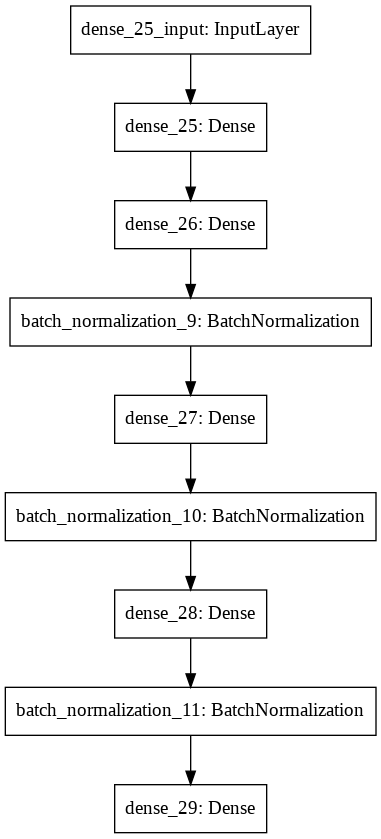

In [ ]:
#wider
np.random.seed(0)
NN_val_shp_wide_model = Sequential()
#Input
NN_val_shp_wide_model.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
#hidden
NN_val_shp_wide_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_wide_model.add(BatchNormalization())
NN_val_shp_wide_model.add(Dense(x_train.shape[1]*8, activation='relu'))
NN_val_shp_wide_model.add(BatchNormalization())
NN_val_shp_wide_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_wide_model.add(BatchNormalization())

#Output
NN_val_shp_wide_model.add(Dense(1, activation='linear'))

NN_val_shp_wide_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_val_shp_wide_model.summary()
keras.utils.plot_model(NN_val_shp_wide_model)

In [ ]:
NN_val_shp_wide_model.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch

Epoch 1/25
2500/2500 [==============================] - 7s 3ms/step - loss: 123299.0859 - mse: 123299.0859 - mae: 269.6773 - mape: 44.3591 - val_loss: 2599.0923 - val_mse: 2599.0923 - val_mae: 38.8570 - val_mape: 6.5639
Epoch 2/25
2500/2500 [==============================] - 6s 3ms/step - loss: 2764.9895 - mse: 2764.9895 - mae: 40.7511 - mape: 6.8683 - val_loss: 2411.1914 - val_mse: 2411.1914 - val_mae: 36.8143 - val_mape: 6.2783
Epoch 3/25
2500/2500 [==============================] - 6s 3ms/step - loss: 2645.9807 - mse: 2645.9807 - mae: 39.8420 - mape: 6.7107 - val_loss: 2563.0486 - val_mse: 2563.0486 - val_mae: 38.2327 - val_mape: 6.5286
Epoch 4/25
2500/2500 [==============================] - 6s 3ms/step - loss: 2614.9131 - mse: 2614.9131 - mae: 39.6672 - mape: 6.6779 - val_loss: 2349.5330 - val_mse: 2349.5330 - val_mae: 37.6019 - val_mape: 6.2944
Epoch 5/25
2500/2500 [==============================] - 6s 3ms/step - loss: 2562.8169 - mse: 2562.8169 - mae: 39.2345 - mape: 6.6020 - val

In [ ]:
NN_val_shp_wide_model_prediction_train = NN_val_shp_wide_model.predict(x_train)
NN_val_shp_wide_model_prediction_train = pd.DataFrame(NN_val_shp_wide_model_prediction_train, columns = ['cred_score_pred'])
NN_val_shp_wide_rsq_train = metrics.r2_score(y_train, NN_val_shp_wide_model_prediction_train)
NN_val_shp_wide_MAE_train = metrics.mean_absolute_error(y_train, NN_val_shp_wide_model_prediction_train)

print(NN_val_shp_wide_rsq_train)
print(NN_val_shp_wide_MAE_train)

0.8641835047885764
33.298336


In [ ]:
NN_val_shp_wide_model_prediction_test = NN_val_shp_wide_model.predict(x_test)
NN_val_shp_wide_model_prediction_test = pd.DataFrame(NN_val_shp_wide_model_prediction_test, columns = ['cred_score_pred'])
NN_val_shp_wide_rsq_test = metrics.r2_score(y_test, NN_val_shp_wide_model_prediction_test)
NN_val_shp_wide_MAE_test = metrics.mean_absolute_error(y_test, NN_val_shp_wide_model_prediction_test)

print(NN_val_shp_wide_rsq_test)
print(NN_val_shp_wide_MAE_test)

0.8486602617638239
35.053627


neither did going wider

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 38)                1482      
_________________________________________________________________
dense_31 (Dense)             (None, 38)                1482      
_________________________________________________________________
dense_32 (Dense)             (None, 76)                2964      
_________________________________________________________________
dense_33 (Dense)             (None, 152)               11704     
_________________________________________________________________
dense_34 (Dense)             (None, 304)               46512     
_________________________________________________________________
dense_35 (Dense)             (None, 152)               46360     
_________________________________________________________________
dense_36 (Dense)             (None, 76)               

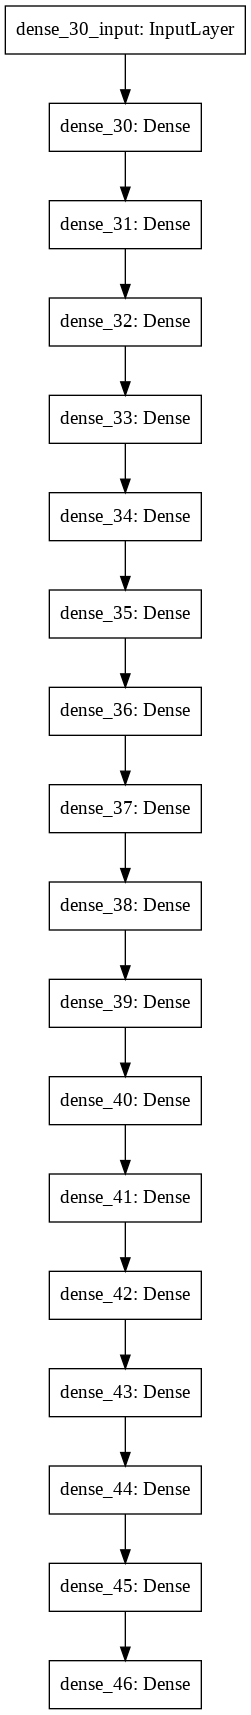

In [ ]:
#deeper
np.random.seed(0)
NN_val_shp_wide_deep_model = Sequential()
#Input
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
#hidden
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1], activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*8, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1], activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]/2, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1], activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*8, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*4, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1]*2, activation='relu'))
NN_val_shp_wide_deep_model.add(Dense(x_train.shape[1], activation='relu'))
#Output
NN_val_shp_wide_deep_model.add(Dense(1, activation='linear'))

NN_val_shp_wide_deep_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
NN_val_shp_wide_deep_model.summary()
keras.utils.plot_model(NN_val_shp_wide_deep_model)

In [ ]:
NN_val_shp_wide_deep_model.fit(x_train, y_train, epochs=nepoch, validation_data=(x_test, y_test)) #, batch_size=nbatch

Epoch 1/25
2500/2500 [==============================] - 10s 4ms/step - loss: 9628.6797 - mse: 9628.6797 - mae: 59.3964 - mape: 9.9148 - val_loss: 2845.2395 - val_mse: 2845.2395 - val_mae: 40.7588 - val_mape: 7.0172
Epoch 2/25
2500/2500 [==============================] - 10s 4ms/step - loss: 2915.3501 - mse: 2915.3501 - mae: 41.8595 - mape: 7.0243 - val_loss: 2753.7949 - val_mse: 2753.7949 - val_mae: 40.8593 - val_mape: 6.7265
Epoch 3/25
2500/2500 [==============================] - 10s 4ms/step - loss: 2735.9861 - mse: 2735.9861 - mae: 40.4909 - mape: 6.7856 - val_loss: 3040.2490 - val_mse: 3040.2490 - val_mae: 42.6000 - val_mape: 7.3542
Epoch 4/25
2500/2500 [==============================] - 10s 4ms/step - loss: 2586.1777 - mse: 2586.1777 - mae: 39.1903 - mape: 6.5625 - val_loss: 2831.4541 - val_mse: 2831.4541 - val_mae: 40.3490 - val_mape: 6.9409
Epoch 5/25
2500/2500 [==============================] - 10s 4ms/step - loss: 2489.4421 - mse: 2489.4421 - mae: 38.3500 - mape: 6.4220 - val_

In [ ]:
NN_val_shp_wide_deep_model_prediction_train = NN_val_shp_wide_deep_model.predict(x_train)
NN_val_shp_wide_deep_model_prediction_train = pd.DataFrame(NN_val_shp_wide_deep_model_prediction_train, columns = ['cred_score_pred'])
NN_val_shp_wide_deep_rsq_train = metrics.r2_score(y_train, NN_val_shp_wide_deep_model_prediction_train)
NN_val_shp_wide_deep_MAE_train = metrics.mean_absolute_error(y_train, NN_val_shp_wide_deep_model_prediction_train)

print(NN_val_shp_wide_deep_rsq_train)
print(NN_val_shp_wide_deep_MAE_train)

0.8508478288718817
35.473442


In [ ]:
NN_val_shp_wide_deep_model_prediction_test = NN_val_shp_wide_deep_model.predict(x_test)
NN_val_shp_wide_deep_model_prediction_test = pd.DataFrame(NN_val_shp_wide_deep_model_prediction_test, columns = ['cred_score_pred'])
NN_val_shp_wide_deep_rsq_test = metrics.r2_score(y_test, NN_val_shp_wide_deep_model_prediction_test)
NN_val_shp_wide_deep_MAE_test = metrics.mean_absolute_error(y_test, NN_val_shp_wide_deep_model_prediction_test)

print(NN_val_shp_wide_deep_rsq_test)
print(NN_val_shp_wide_deep_MAE_test)

0.8388128051162264
36.897873


neither deeper

In [ ]:

start = 0
end = 0
start = time.time()

# user variables to tune
folds   = 10
#metric  = "neg_mean_absolute_error"
metric  = "r2"

# hold different regression models in a single dictionary
models = {}
models["OLS"]           = LinearRegression()
models["KNN"]           = KNeighborsRegressor()
models["Ridge"]         = Ridge()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"]       = XGBRegressor()


# 10-fold cross validation for each model
model_results = []
model_names   = []
technique_times = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: Mean R sq{}, StDev R sq{}".format(model_name, round(results.mean(), 4), round(results.std(), 4)))
    end = time.time()
    technique_time = end - start
    technique_times.append(technique_time)
    print("Model processing time {}: {}".format(model_name, str(datetime.timedelta(seconds=technique_time))))
gc.collect()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


OLS: Mean R sq0.5995, StDev R sq0.0086
Model processing time OLS: 0:00:01.233300


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: Mean R sq0.763, StDev R sq0.0054
Model processing time KNN: 0:04:00.990834


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Ridge: Mean R sq0.5995, StDev R sq0.0086
Model processing time Ridge: 0:04:01.461174


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Lasso: Mean R sq0.5958, StDev R sq0.0081
Model processing time Lasso: 0:04:02.919455


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ElasticNet: Mean R sq0.5639, StDev R sq0.007
Model processing time ElasticNet: 0:04:03.975112


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTree: Mean R sq0.7418, StDev R sq0.0081
Model processing time DecisionTree: 0:04:14.854353


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest: Mean R sq0.8696, StDev R sq0.0036
Model processing time RandomForest: 0:15:28.453190


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost: Mean R sq0.7375, StDev R sq0.0057
Model processing time AdaBoost: 0:17:10.479828


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoost: Mean R sq0.8457, StDev R sq0.0034
Model processing time GradientBoost: 0:20:06.193515
[08:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[08:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

16863

In [ ]:
print(model_results)
print(model_names)
print(technique_times)

[array([0.59963734, 0.6057454 , 0.60011205, 0.59759398, 0.58892717,
       0.60759301, 0.57921029, 0.60708126, 0.60628448, 0.60257826]), array([0.75735317, 0.76773678, 0.76398776, 0.76270175, 0.75369547,
       0.76974828, 0.75587372, 0.76306768, 0.76874849, 0.7669234 ]), array([0.59963756, 0.60574519, 0.60011192, 0.59759472, 0.58892824,
       0.60759253, 0.57920969, 0.6070817 , 0.60628402, 0.60257869]), array([0.59707596, 0.6005889 , 0.59684818, 0.59503991, 0.58744546,
       0.60222126, 0.57529878, 0.60401686, 0.60019338, 0.59905918]), array([0.56251203, 0.56753211, 0.56720714, 0.56208081, 0.55989614,
       0.56666052, 0.54557962, 0.57227682, 0.56647528, 0.56912794]), array([0.73857306, 0.73463843, 0.74289636, 0.75202009, 0.7417724 ,
       0.75013141, 0.72525668, 0.73755723, 0.74214348, 0.75308798]), array([0.86803478, 0.86705582, 0.86930048, 0.87376908, 0.86843605,
       0.8743032 , 0.86348584, 0.86684096, 0.86945377, 0.87529483]), array([0.73196405, 0.73119405, 0.74008821, 0.74

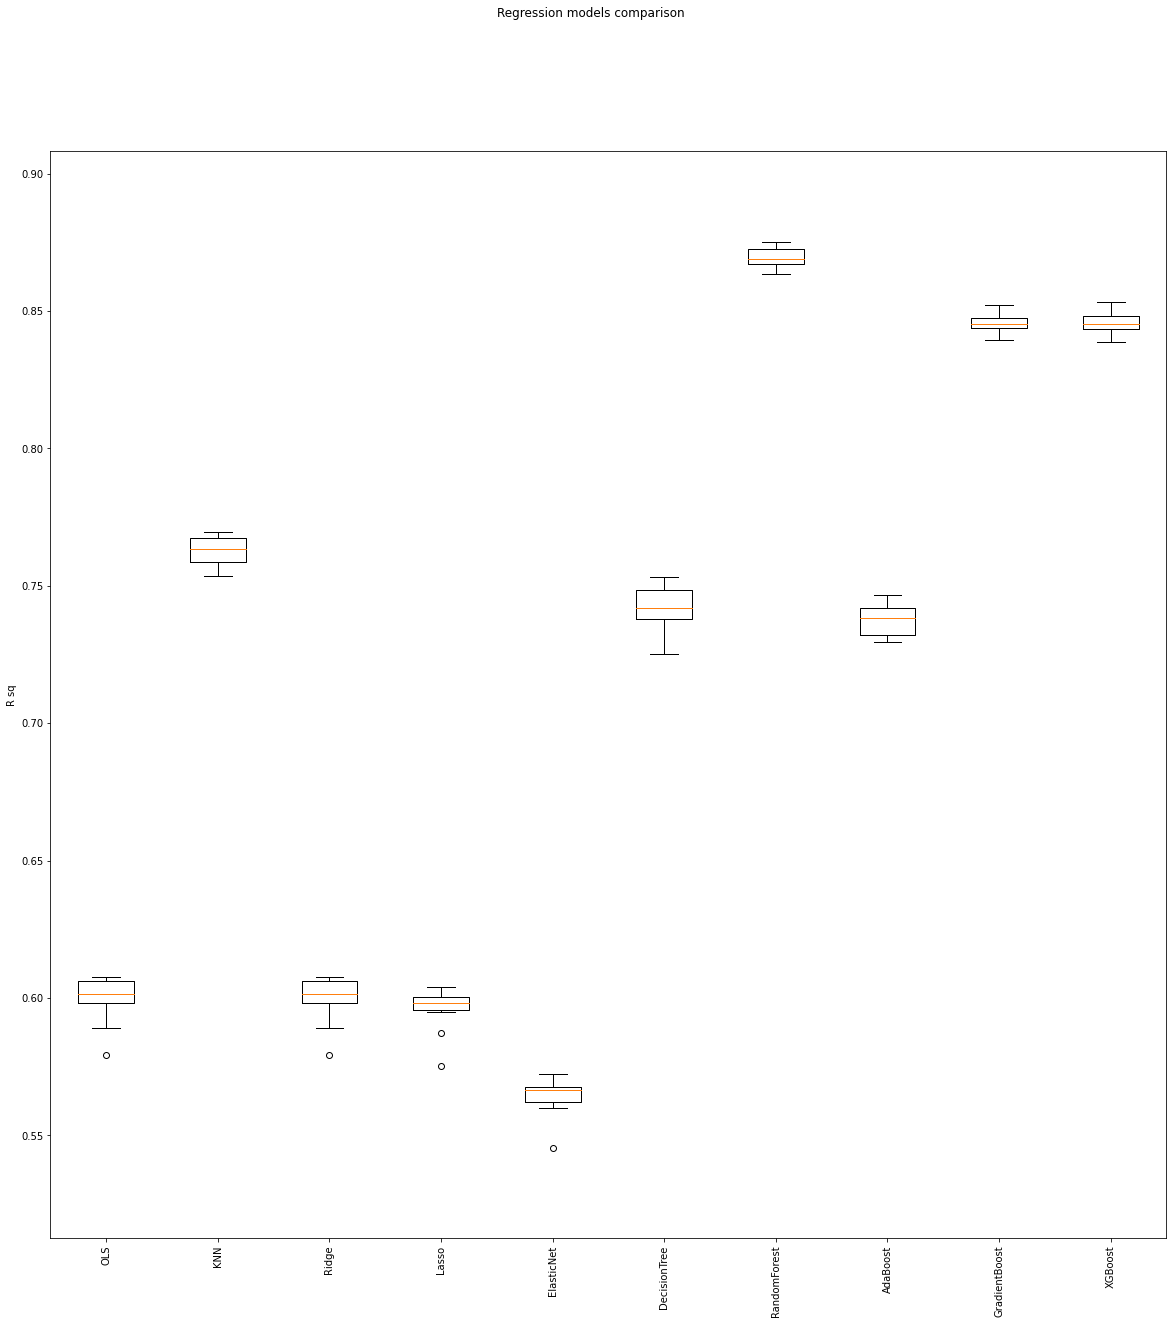

In [ ]:
# boxplot different models' performance
figure = plt.figure(figsize = (20,20))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 90)
#axis.set_ylabel("Mean Absolute Error (MAE)")
axis.set_ylabel("R sq");
plt.margins(0.05, 0.1)

In [ ]:
#estimator = NN_model.fit(x_train, y_train, epochs=nepoch) #, batch_size=nbatch
#kfold = KFold(n_splits=10)
#results = cross_val_score(estimator, X, Y, cv=kfold)

In [ ]:
#model_prediction_kfold = results.predict(x_train)


In [ ]:
#model_prediction_kfold = pd.DataFrame(model_prediction_kfold, columns = ['cred_score_pred'])
#rsq = metrics.r2_score(y_train, model_prediction_kfold)
#MAE = metrics.mean_absolute_error(y_train, model_prediction_kfold)

#print(rsq)
#print(MAE)

In [ ]:
#plt.plot(hist.history['mean_squared_error'])
#plt.plot(hist.history['mean_absolute_error'])
#plt.plot(hist.history['mean_absolute_percentage_error'])
#pyplot.plot(history.history['cosine_proximity'])
#plt.show()

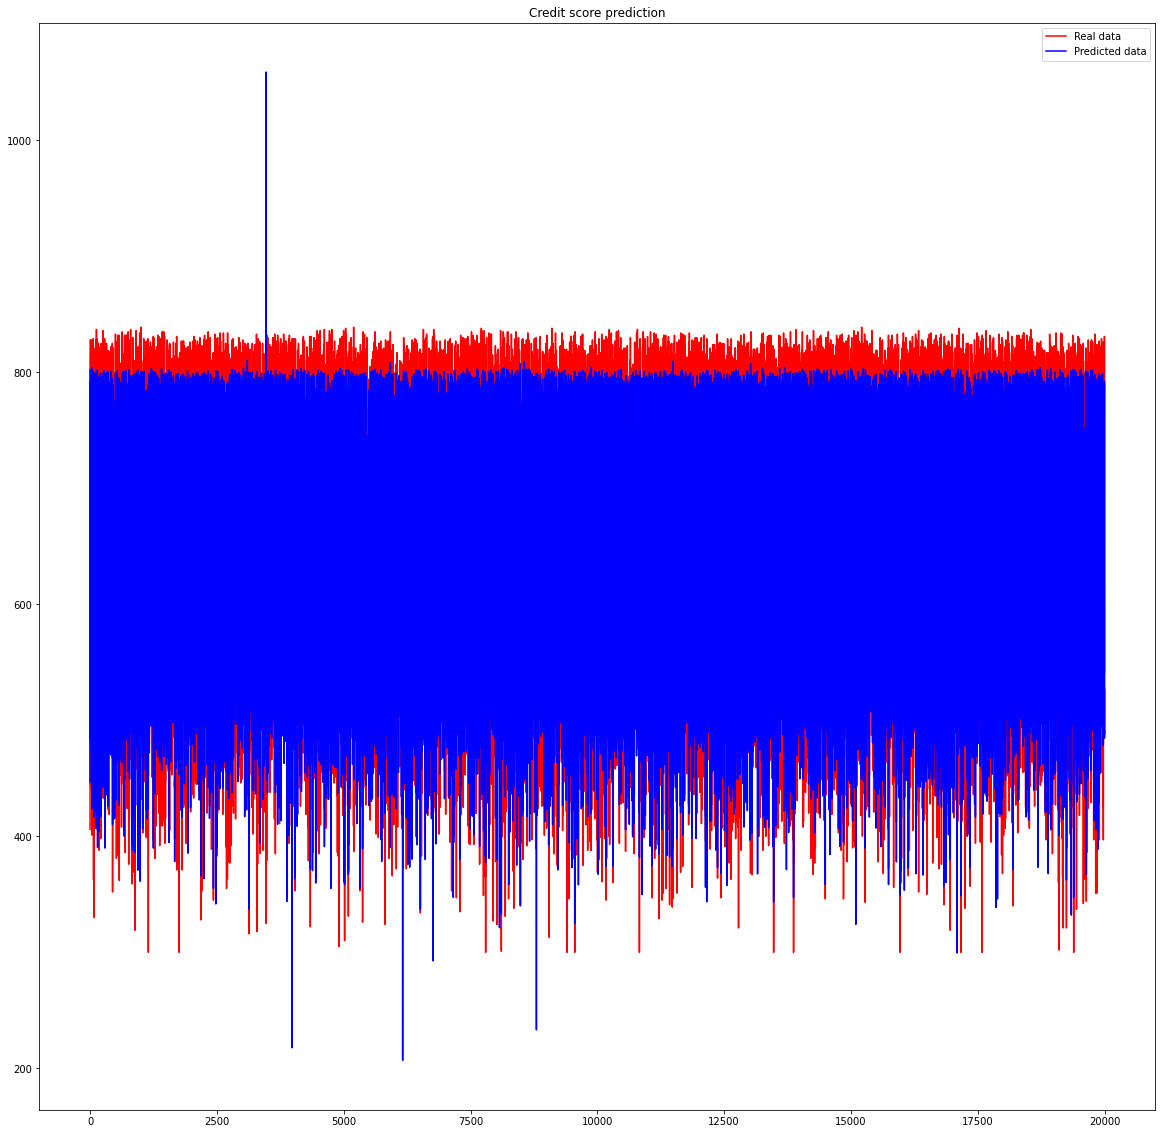

In [ ]:
plt.figure(figsize=(20, 20))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(NN_val_shp_model_norm_prediction_test, color = 'blue', label = 'Predicted data')
plt.title('Credit score prediction')
plt.legend()
plt.show()

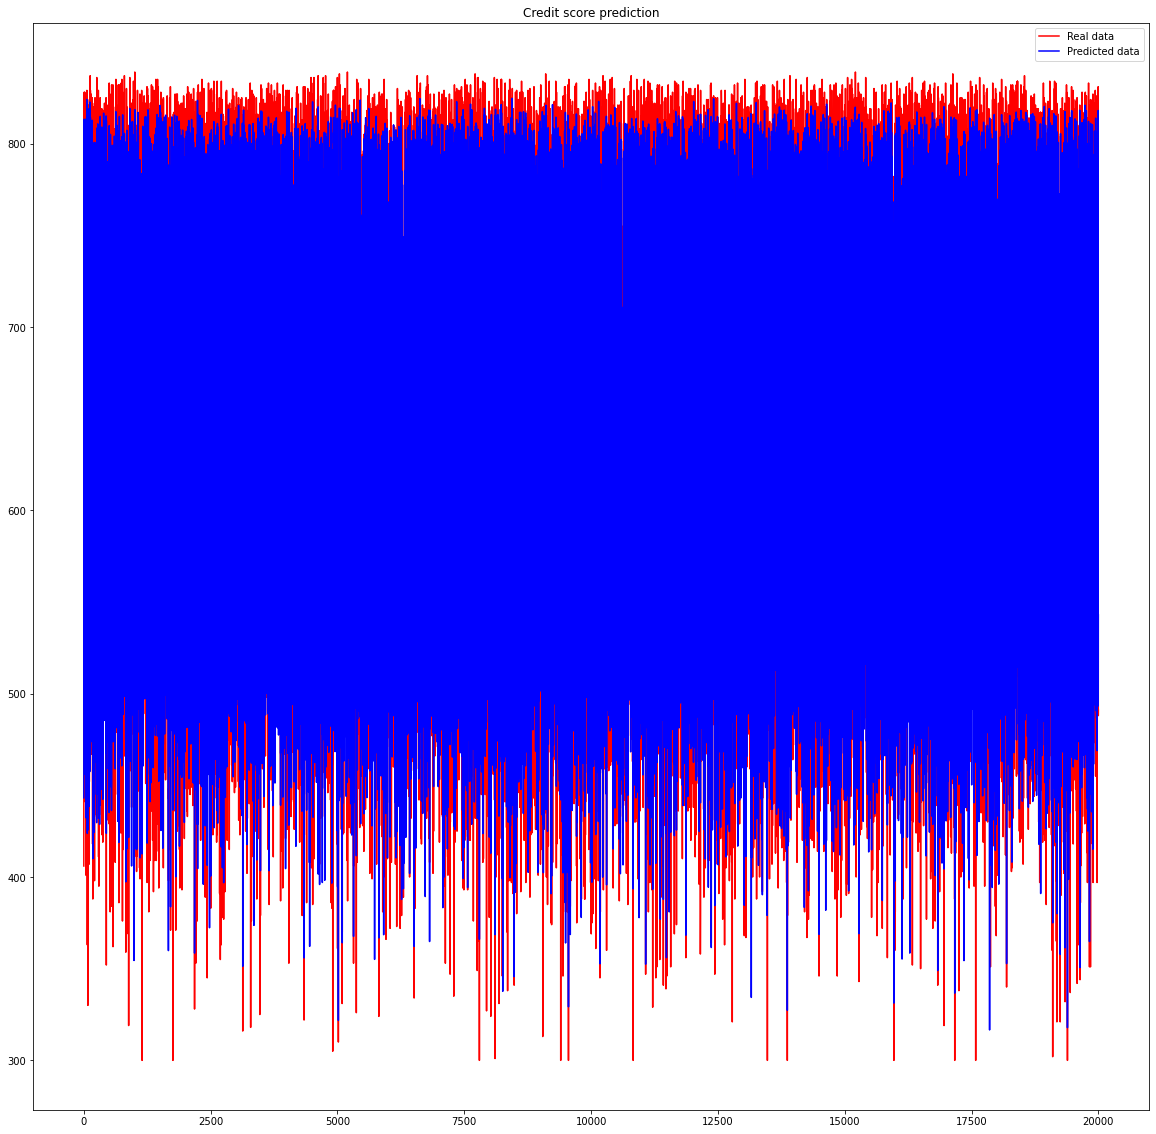

In [ ]:
plt.figure(figsize=(20, 20))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(RFR_model_prediction_test, color = 'blue', label = 'Predicted data')
plt.title('Credit score prediction')
plt.legend()
plt.show()

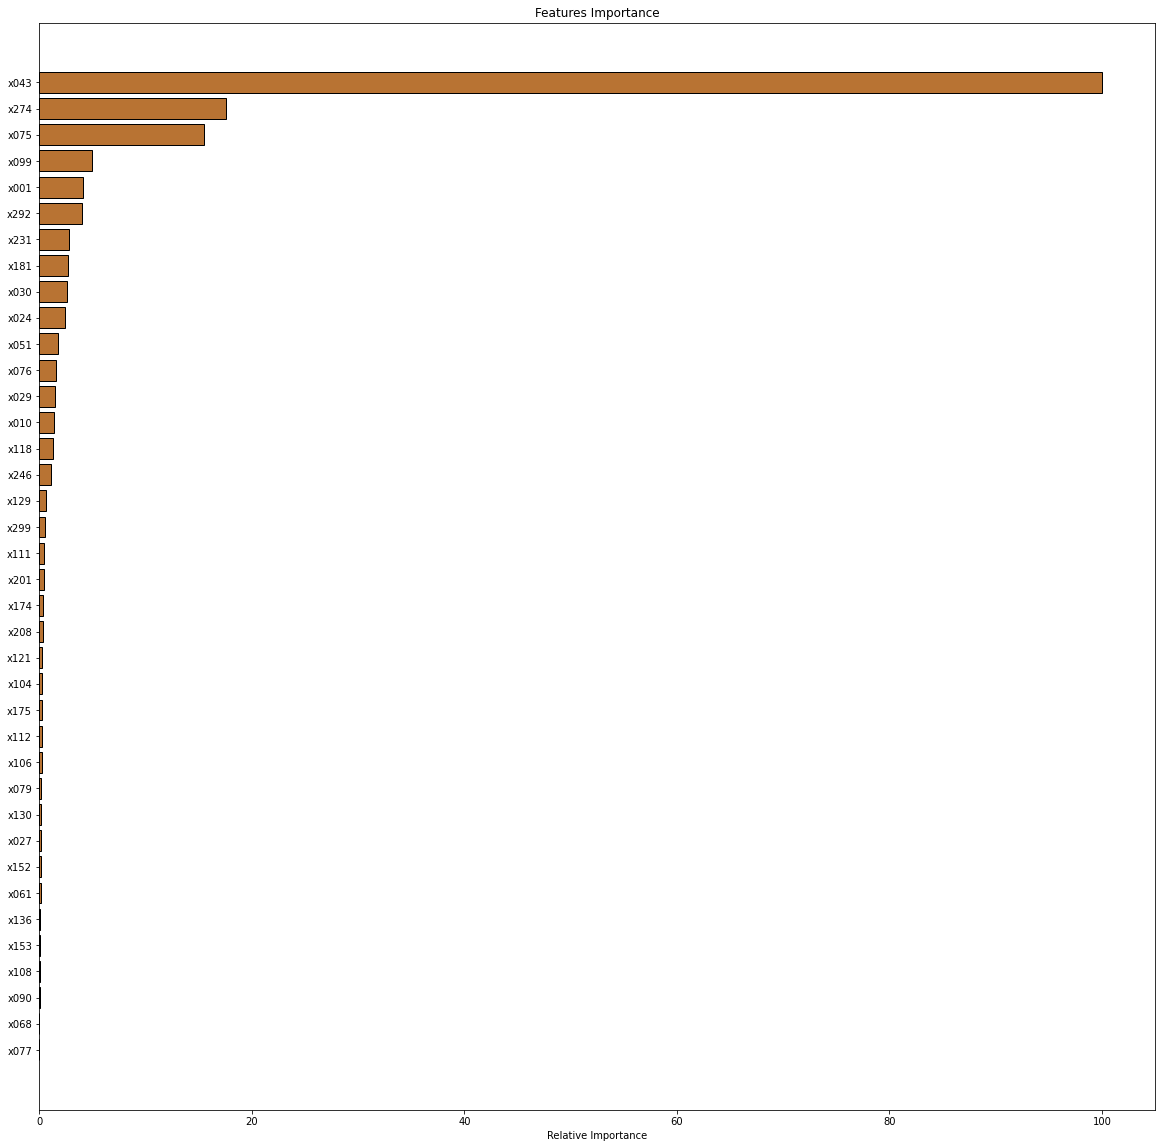

In [ ]:
feature_importance = RFR_model.feature_importances_
feature_importance = (feature_importance / feature_importance.max())*100

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0])

plt.figure(figsize = (20,20))

#Make a horizontal bar plot.
plt.barh(pos, feature_importance[sorted_idx], color='#B87333', edgecolor = 'black')
plt.yticks(pos, df_credit_score_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Features Importance');

In [ ]:
#print (feature_importance)
print(pd.DataFrame(feature_importance[sorted_idx],index=df_credit_score_train.columns[sorted_idx]))
#pos, feature_importance[sorted_idx]

               0
x077    0.016580
x068    0.020413
x090    0.047245
x108    0.082653
x153    0.116309
x136    0.119051
x061    0.126423
x152    0.135749
x027    0.159863
x130    0.162180
x079    0.193956
x106    0.233021
x112    0.257787
x175    0.262039
x104    0.289652
x121    0.306690
x208    0.330525
x174    0.354677
x201    0.417524
x111    0.433693
x299    0.586651
x129    0.617034
x246    1.139718
x118    1.292395
x010    1.388431
x029    1.520514
x076    1.601282
x051    1.722501
x024    2.408972
x030    2.604046
x181    2.698014
x231    2.831868
x292    4.057699
x001    4.130505
x099    4.929646
x075   15.509323
x274   17.583794
x043  100.000000


In [ ]:
#import shap

# load your data here, e.g. X and y
# create and fit your model here

# load JS visualization code to notebook
#shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
#explainer = shap.TreeExplainer(NN_val_shp_model_norm)
#shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

#shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor#import eli5#from eli5.sklearn import PermutationImportance##def base_model():#    NN_val_shp_model_norm = Sequential()        #    #Input#    NN_val_shp_model_norm.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))##NN_val_shp_model_norm.add(BatchNormalization())##hidden#    NN_val_shp_model_norm.add(Dense(x_train.shape[1]*2, activation='relu'))#    NN_val_shp_model_norm.add(BatchNormalization())#    NN_val_shp_model_norm.add(Dense(x_train.shape[1]*4, activation='relu'))#    NN_val_shp_model_norm.add(BatchNormalization())#    NN_val_shp_model_norm.add(Dense(x_train.shape[1]*2, activation='relu'))#    NN_val_shp_model_norm.add(BatchNormalization())##Output#    NN_val_shp_model_norm.add(Dense(1, activation='linear'))##NN_val_shp_model_norm.add(BatchNormalization())##    NN_val_shp_model_norm.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])#    return NN_val_shp_model_norm##X = x_train#y = y_train##my_model = KerasRegressor(build_fn=base_model)    #my_model.fit(X,y, epochs=nepoch, validation_data=(x_test, y_test))##perm = PermutationImportance(my_model, random_state=0).fit(X,y, epochs=nepoch, validation_data=(x_test, y_test))#eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
print(NN_rsq_test)
print(NN_val_rsq_test)
print(NN_val_shp_rsq_test)
print(NN_val_shp_norm_rsq_test)
print(NN_val_shp_model_norm_sig_rsq_test)
print(NN_val_shp_model_norm_drop_rsq_test)
print(NN_val_shp_wide_rsq_test)
print(NN_val_shp_wide_deep_rsq_test)

print(NN_MAE_test)
print(NN_val_MAE_test)
print(NN_val_shp_MAE_test)
print(NN_val_shp_norm_MAE_test)
print(NN_val_shp_model_norm_sig_MAE_test)
print(NN_val_shp_model_norm_drop_MAE_test)
print(NN_val_shp_wide_MAE_test)
print(NN_val_shp_wide_deep_MAE_test)

0.8473739928802102
0.8518944654179468
0.8518182206693641
0.8506459055441907
0.8535277999735383
0.8462402276389205
0.8486602617638239
0.8388128051162264
34.86608
34.352364
34.308647
34.601425
34.159233
35.048977
35.053627
36.897873


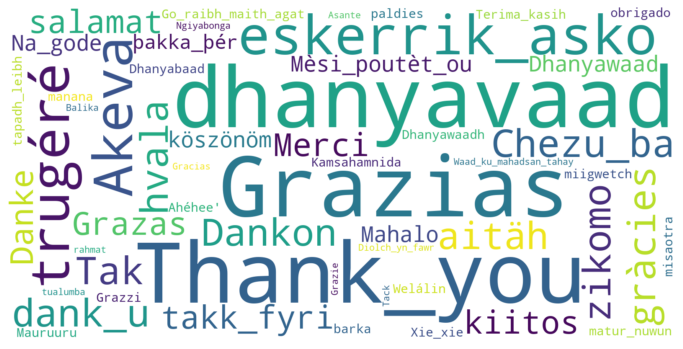

In [ ]:
text = """dhanyavaad,dhanyavaad,dhanyavaad,dhanyavaad,Grazias,eskerrik_asko,trugéré,Akeva,Chezu_ba,gràcies,zikomo,hvala,Tak,dank_u,Dankon,aitäh,takk_fyri,salamat,kiitos,Merci,Grazas,Danke,Mèsi_poutèt_ou,Na_gode,Mahalo,Dhanyawaad,köszönöm,þakka_þér,Go_raibh_maith_agat,matur_nuwun,Kamsahamnida,Thank_you,paldies,misaotra,Terima_kasih,Grazzi,Xie_xie,Thank_you,Mauruuru,Dhanyawaadh,Welálin,barka,Ahéhee',Dhanyabaad,Thank_you,miigwetch,manana,obrigado,tapadh_leibh,Waad_ku_mahadsan_tahay,Gracias,Asante,Tack,rahmat,tualumba,Diolch_yn_fawr,Balika,Ngiyabonga,Grazie
"""

wordcloud = WordCloud(
    background_color = 'white',
    width = 1600, height = 800,
    max_font_size = 200,
    relative_scaling= 0
).generate(text)

plt.figure(figsize=(12,10))
plt.title(
    '',
    fontweight = 'bold',
    fontsize=30
)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()